# Load the modules

In [1]:
import time
import multiprocessing
start = time.perf_counter()
    
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as ks
from tensorflow.keras import layers
from tensorflow.estimator import LinearClassifier
from tensorflow.estimator import LinearRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, r2_score
from keras.layers import Dense
from keras.utils import to_categorical 
print(tf.__version__)

end = time.perf_counter()
print(f'Finished in {round(end-start, 2)} seconds') 

2.9.1
Finished in 6.08 seconds


In [2]:
# BigQuery
#from google.cloud import bigquery
#bigquery_client = bigquery.Client(project='YOUR PROJECT ID')

# Cloud Storage
from google.cloud import storage
storage_client = storage.Client(project='YOUR PROJECT ID')

In [2]:
#Clear memory after del deleting, then removed from memory through the command gc.collect()
#del train_data
import gc
gc.collect()

18

In [46]:
#Read fewer lines of the data
from pyarrow.parquet import ParquetFile
import pyarrow as pa 


In [3]:
import seaborn as sns
plt.style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import time
from lightgbm import LGBMClassifier
import lightgbm as lgb

from pyarrow.parquet import ParquetFile
import pyarrow as pa 

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline


# Load data

In [2]:
train_data = pd.read_csv("train_data-1.csv")
train_labels = pd.read_csv("train_labels-1.csv")
train_data.shape

#If your data is in parquet, you can use the below code to load part of the data, loading all you can exceed memory limit
"""
pf = ParquetFile('../input/american-express-default-prediction-snappy-parquet/train_data.snappy.parquet') 
first_ten_rows = next(pf.iter_batches(batch_size = 3000000)) 
train_data = pa.Table.from_batches([first_ten_rows]).to_pandas()
train_data.head()
"""

"\npf = ParquetFile('../input/american-express-default-prediction-snappy-parquet/train_data.snappy.parquet') \nfirst_ten_rows = next(pf.iter_batches(batch_size = 3000000)) \ntrain_data = pa.Table.from_batches([first_ten_rows]).to_pandas()\ntrain_data.head()\n"

In [4]:
train_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [30]:
train_data.set_index('customer_ID',  inplace=True)

In [31]:
process_columns = list(train_data.columns)
process_columns.remove('S_2')

In [32]:
temp_df = train_data.copy()

In [21]:
temp_df[['P_2']].sort_values(by=['P_2'])

,P_2
3841,-0.256921
11282,-0.234698
9452,-0.227871
9451,-0.222265
9832,-0.220154
...,...
18131,NaN
18132,NaN
18133,NaN
18978,NaN


In [23]:
df=df[df['P_2'].notna()].drop_duplicates(subset=['P_2']).reset_index(drop=True)

In [27]:
df['temp'] = np.floor(df['P_2'] * 100000)

In [28]:
((df['temp'] - df['temp'].shift()).abs() >= 100).cumsum()

0          0
1          1
2          2
3          3
4          4
        ... 
19845    100
19846    100
19847    100
19848    100
19849    100
Name: temp, Length: 19850, dtype: int64

In [35]:
train_data

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,NaN,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,NaN,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,NaN,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00f1a86f27bca5827f9095676b65e2e920dd1f74eb45c5f89d8e947a34b10371,2018-03-02,0.832745,0.008309,0.004201,1.004332,0.004786,-0.080020,0.000256,0.014276,NaN,...,NaN,NaN,NaN,0.006261,0.000935,0.009377,NaN,0.002780,0.008885,0.006303
00f1aea27e2b2e8504b3c0e3c691e1ed60b16a9d6b5961b9232e2e0f1fad84b8,2017-03-03,0.870948,0.004101,0.004307,0.813405,0.001476,NaN,0.005337,0.002361,NaN,...,NaN,NaN,NaN,0.008456,0.008546,0.007936,NaN,0.008600,0.002080,0.002491
00f1aea27e2b2e8504b3c0e3c691e1ed60b16a9d6b5961b9232e2e0f1fad84b8,2017-04-03,0.875560,0.001806,0.009063,0.814070,0.008061,NaN,0.005790,0.003433,NaN,...,NaN,NaN,NaN,0.004083,0.009451,0.001949,NaN,0.007942,0.002523,0.001238


In [34]:
temp_df

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-03-09,536.0,0,0,5.0,0,31.0,0.0,0.0,NaN,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-04-07,535.0,0,0,4.0,0,31.0,0.0,0.0,NaN,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-05-28,545.0,3,0,5.0,0,31.0,0.0,0.0,NaN,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-06-13,548.0,0,0,4.0,0,29.0,0.0,0.0,NaN,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-07-16,541.0,0,0,4.0,0,29.0,0.0,0.0,NaN,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00f1a86f27bca5827f9095676b65e2e920dd1f74eb45c5f89d8e947a34b10371,2018-03-02,475.0,0,0,5.0,0,-20.0,0.0,0.0,NaN,...,NaN,NaN,NaN,0.006261,0.000935,0.009377,NaN,0.002780,0.008885,0.006303
00f1aea27e2b2e8504b3c0e3c691e1ed60b16a9d6b5961b9232e2e0f1fad84b8,2017-03-03,497.0,0,0,4.0,0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,0.008456,0.008546,0.007936,NaN,0.008600,0.002080,0.002491
00f1aea27e2b2e8504b3c0e3c691e1ed60b16a9d6b5961b9232e2e0f1fad84b8,2017-04-03,500.0,0,0,4.0,0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,0.004083,0.009451,0.001949,NaN,0.007942,0.002523,0.001238


In [33]:
#Remove detected noise using unified single one
#inspireed from https://www.kaggle.com/competitions/amex-default-prediction/discussion/347637
for col in process_columns: 

        df = temp_df[[col]].sort_values(by=[col]) 
        df = df[df[col].notna()].drop_duplicates(subset=[col]).reset_index(drop=True)

        df['temp'] = np.floor(df[col] * 100000)
        df['group'] = ((df['temp'] - df['temp'].shift()).abs() >= 100).cumsum()

        i = 0
        while True:
            min_val = df[df['group']==i]['temp'].min()
            if min_val>0:
                break
            i += 1

        df['temp2'] = np.where(df['temp']>=0, 
                                np.floor(df['temp']/min_val).astype(np.int32),
                                np.round(df['temp']/min_val).astype(np.int32))

        mapping = dict(zip(df[col],df['temp2']))
        temp_df[col] = temp_df[col].map(mapping)

        print(col, df['group'].nunique(), df[col].nunique())
        print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))

P_2 101 19850
          temp                        temp2                   
           min      max count nunique   min  max count nunique
group                                                         
0     -25693.0 -25693.0     1       1  -147 -147     1       1
1     -23470.0 -23470.0     1       1  -134 -134     1       1
2     -22788.0 -22788.0     1       1  -130 -130     1       1
3     -22227.0 -22227.0     1       1  -127 -127     1       1
4     -22016.0 -22016.0     1       1  -126 -126     1       1
5     -21737.0 -21737.0     1       1  -124 -124     1       1
6     -21540.0 -21511.0     3       3  -123 -123     3       1
7     -20720.0 -20720.0     1       1  -118 -118     1       1
8     -20342.0 -20342.0     1       1  -116 -116     1       1
9     -20080.0 -20080.0     1       1  -115 -115     1       1
10    -19071.0 -19061.0     2       2  -109 -109     2       1
11    -18566.0 -18566.0     1       1  -106 -106     1       1
12    -18212.0 -18212.0     1       1  -1

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))


B_1 208 19999
          temp                         temp2                   
           min      max  count nunique   min max  count nunique
group                                                          
0     -14147.0 -14147.0      1       1    -1  -1      1       1
1     -10437.0 -10437.0      1       1     0   0      1       1
2      -7962.0  -7962.0      1       1     0   0      1       1
3      -6786.0  -6786.0      1       1     0   0      1       1
4      -5642.0  -5642.0      1       1     0   0      1       1
5      -4680.0  -4680.0      1       1     0   0      1       1
6      -4186.0  -4186.0      1       1     0   0      1       1
7      -3527.0  -3527.0      1       1     0   0      1       1
8      -2637.0  -2637.0      1       1     0   0      1       1
9      -2405.0  -2405.0      1       1     0   0      1       1
10     -2078.0  -2078.0      1       1     0   0      1       1
11     -1899.0  -1872.0      2       2     0   0      2       1
12     -1628.0  -1550.0   

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))


          temp                         temp2                   
           min      max  count nunique   min max  count nunique
group                                                          
0          0.0   2041.0  17449    1090     0   0  17449       1
1       2169.0   3596.0     42      42     1   1     42       1
2       3742.0   3807.0      2       2     1   1      2       1
3       4000.0   4043.0      2       2     1   1      2       1
4       4353.0   4353.0      1       1     2   2      1       1
5       4468.0   4498.0      2       2     2   2      2       1
6       4641.0   4663.0      2       2     2   2      2       1
7       4889.0   4889.0      1       1     2   2      1       1
8       5004.0   5004.0      1       1     2   2      1       1
9       5388.0   5388.0      1       1     2   2      1       1
10      5612.0   5821.0      4       4     2   2      4       1
11      6044.0   6044.0      1       1     2   2      1       1
12      6509.0   6509.0      1       1  

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))


B_3 167 19997
          temp                         temp2                   
           min      max  count nunique   min max  count nunique
group                                                          
0          0.0  37710.0  17315    6975     0   0  17315       1
1      37813.0  38153.0     32      31     1   1     32       1
2      38279.0  58761.0   1131    1108     1   1   1131       1
3      58867.0  59120.0     14      14     1   1     14       1
4      59226.0  59275.0      3       3     1   1      3       1
5      59397.0  59509.0      4       4     1   1      4       1
6      59635.0  60929.0     54      54     1   1     54       1
7      61051.0  61401.0     10      10     1   1     10       1
8      61512.0  61559.0      6       6     1   1      6       1
9      61671.0  61878.0      9       9     1   1      9       1
10     62030.0  62569.0     22      20     1   1     22       1
11     62684.0  63169.0     21      21     1   1     21       1
12     63286.0  64069.0   

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))


D_44 37 19080
           temp                          temp2                   
            min       max  count nunique   min max  count nunique
group                                                            
0           0.0     999.0  12166    1000     0   0  12166       1
1       12500.0   13499.0   2799     940     1   1   2799       1
2       25001.0   25999.0   1484     798     2   2   1484       1
3       37502.0   38499.0    924     589     3   3    924       1
4       50000.0   50998.0    671     472     4   4    671       1
5       62504.0   63496.0    407     339     5   5    407       1
6       75002.0   75994.0    230     200     6   6    230       1
7       87501.0   88488.0    141     135     7   7    141       1
8      100021.0  100978.0     96      92     8   8     96       1
9      112501.0  113476.0     77      75     9   9     77       1
10     125024.0  125153.0      8       7    10  10      8       1
11     125279.0  125920.0     24      23    10  10     24     

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))


          temp                          temp2                      
           min      max  count nunique    min    max  count nunique
group                                                              
0          5.0  53131.0  17440   13875      1  10626  17440    7557
1      53240.0  65967.0    927     893  10648  13193    927     776
2      66070.0  67961.0    104     101  13214  13592    104      87
3      68095.0  69281.0     78      77  13619  13856     78      70
4      69388.0  70005.0     45      44  13877  14001     45      41
5      70117.0  78222.0    536     518  14023  15644    536     455
6      78342.0  79925.0     60      59  15668  15985     60      56
7      80037.0  80085.0      3       3  16007  16017      3       3
8      80204.0  80254.0      6       6  16040  16050      6       6
9      80437.0  81862.0     53      53  16087  16372     53      51
10     82073.0  83537.0     54      54  16414  16707     54      52
11     83778.0  84136.0     11      11  16755  1

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))


D_46 335 15731
           temp                         temp2                    
            min       max count nunique   min   max count nunique
group                                                            
0     -126006.0 -126006.0     1       1 -1146 -1146     1       1
1     -122940.0 -122940.0     1       1 -1118 -1118     1       1
2     -120245.0 -120245.0     1       1 -1093 -1093     1       1
3     -118520.0 -118520.0     1       1 -1077 -1077     1       1
4     -100796.0 -100796.0     1       1  -916  -916     1       1
5      -97944.0  -97944.0     1       1  -890  -890     1       1
6      -92684.0  -92684.0     1       1  -843  -843     1       1
7      -89799.0  -89799.0     1       1  -816  -816     1       1
8      -72959.0  -72959.0     1       1  -663  -663     1       1
9      -64306.0  -64306.0     1       1  -585  -585     1       1
10     -60800.0  -60800.0     1       1  -553  -553     1       1
11     -54627.0  -54627.0     1       1  -497  -497     1    

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))


          temp                        temp2                    
           min      max count nunique   min   max count nunique
group                                                          
0         29.0    962.0    47      45     1    33    47      24
1       1420.0   2408.0   127     117    48    83   127      35
2       2817.0   3812.0   128     121    97   131   128      32
3       4244.0   5220.0   127     122   146   180   127      34
4       5633.0   6630.0   162     149   194   228   162      35
5       7042.0   8041.0   170     155   242   277   170      36
6       8457.0   9443.0    99      91   291   325    99      32
7       9862.0  10850.0   128     119   340   374   128      35
8      11267.0  12261.0   124     118   388   422   124      35
9      12678.0  13675.0    93      90   437   471    93      34
10     14087.0  15081.0    99      92   485   520    99      32
11     15502.0  16487.0    62      59   534   568    62      28
12     16981.0  17900.0    77      75   

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))


          temp                         temp2                   
           min      max  count nunique   min max  count nunique
group                                                          
0      -9692.0  -9692.0      1       1     0   0      1       1
1      -3052.0  -3052.0      1       1     0   0      1       1
2      -1722.0  -1722.0      1       1     0   0      1       1
3      -1093.0  -1021.0      2       2     0   0      2       1
4       -773.0   -773.0      1       1     0   0      1       1
5       -631.0   -391.0     10      10     0   0     10       1
6       -286.0  67345.0  18864   13199     0   0  18864       1
7      67458.0  71204.0    289     271     1   1    289       1
8      71316.0  72235.0     59      57     1   1     59       1
9      72354.0  73764.0     69      65     1   1     69       1
10     73884.0  74217.0     11      11     1   1     11       1
11     74319.0  77347.0    129     127     1   1    129       1
12     77448.0  77909.0     20      20  

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))


          temp                        temp2                    
           min      max count nunique   min   max count nunique
group                                                          
0     -60335.0 -60335.0     1       1 -4641 -4641     1       1
1     -60039.0 -60039.0     1       1 -4618 -4618     1       1
2     -38820.0 -38820.0     1       1 -2986 -2986     1       1
3     -38585.0 -38585.0     1       1 -2968 -2968     1       1
4     -33239.0 -33239.0     1       1 -2557 -2557     1       1
5     -33080.0 -33080.0     1       1 -2545 -2545     1       1
6     -32797.0 -32797.0     1       1 -2523 -2523     1       1
7     -30587.0 -30587.0     1       1 -2353 -2353     1       1
8     -30415.0 -30415.0     1       1 -2340 -2340     1       1
9     -22113.0 -22113.0     1       1 -1701 -1701     1       1
10    -21987.0 -21987.0     1       1 -1691 -1691     1       1
11    -13456.0 -13456.0     1       1 -1035 -1035     1       1
12    -12886.0 -12886.0     1       1  -

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))


           temp                          temp2                   
            min       max  count nunique   min max  count nunique
group                                                            
0           0.0     999.0  10863    1000     0   0  10863       1
1       10000.0   10999.0   4175     985     1   1   4175       1
2       20000.0   20999.0   2138     874     2   2   2138       1
3       30000.0   30998.0   1082     659     3   3   1082       1
4       40003.0   40996.0    590     451     4   4    590       1
5       50000.0   50999.0    358     302     5   5    358       1
6       60002.0   60997.0    242     209     6   6    242       1
7       70002.0   70999.0    173     157     7   7    173       1
8       80006.0   80999.0     79      78     8   8     79       1
9       90006.0   90990.0     76      73     9   9     76       1
10     100007.0  100964.0     50      50    10  10     50       1
11     110006.0  110994.0     51      50    11  11     51       1
12     120

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))


          temp                        temp2                  
           min      max count nunique   min max count nunique
group                                                        
0          0.0  13674.0  4479    2840     0   0  4479       1
1      13798.0  16569.0   103     102     1   1   103       1
2      16700.0  17143.0    20      19     1   1    20       1
3      17326.0  17522.0    12      12     1   1    12       1
4      17719.0  18180.0    16      16     1   1    16       1
5      18338.0  18422.0     4       3     1   1     4       1
6      18529.0  18716.0     8       8     1   1     8       1
7      18828.0  18828.0     1       1     1   1     1       1
8      18937.0  19709.0    28      28     1   1    28       1
9      19842.0  19932.0     6       6     1   1     6       1
10     20046.0  20046.0     1       1     1   1     1       1
11     20156.0  20400.0     9       8     1   1     9       1
12     20509.0  20631.0     4       4     1   1     4       1
13     2

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nuniq

D_54 3 19997
           temp                          temp2                   
            min       max  count nunique   min max  count nunique
group                                                            
0        -197.0    2334.0    410     380     0   0    410       1
1        2462.0    2462.0      1       1     1   1      1       1
2      100000.0  100999.0  19586    1000    40  41  19586       2
R_4 2 19999
           temp                          temp2                   
            min       max  count nunique   min max  count nunique
group                                                            
0           0.0     999.0  19524    1000     0   0  19524       1
1      100001.0  100999.0    475     372     1   1    475       1
S_7 271 16234
          temp                         temp2                   
           min      max  count nunique   min max  count nunique
group                                                          
0     -17153.0 -17153.0      1       1     

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))


B_12 359 19999
          temp                          temp2                      
           min      max  count nunique    min    max  count nunique
group                                                              
0          1.0  28302.0  18709    7883      1  28302  18709    7883
1      28409.0  29207.0     37      35  28409  29207     37      35
2      29309.0  29796.0     29      28  29309  29796     29      28
3      29921.0  29998.0      3       3  29921  29998      3       3
4      30118.0  31400.0     77      74  30118  31400     77      74
5      31505.0  33767.0    156     148  31505  33767    156     148
6      33872.0  34140.0     26      26  33872  34140     26      26
7      34249.0  38069.0    165     162  34249  38069    165     162
8      38171.0  38500.0      8       8  38171  38500      8       8
9      38652.0  38736.0      6       5  38652  38736      6       5
10     38837.0  40510.0     51      51  38837  40510     51      51
11     40668.0  41064.0     12   

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))


          temp                        temp2                  
           min      max count nunique   min max count nunique
group                                                        
0      -1425.0  -1425.0     1       1     0   0     1       1
1      -1325.0   -923.0    11      11     0   0    11       1
2       -811.0  39721.0  8417    7333     0   0  8417       1
3      39825.0  40559.0    30      27     1   1    30       1
4      40659.0  41667.0    43      42     1   1    43       1
5      41778.0  43719.0    96      94     1   1    96       1
6      43849.0  43914.0     3       3     1   1     3       1
7      44017.0  44103.0     6       6     1   1     6       1
8      44214.0  44641.0    17      17     1   1    17       1
9      44746.0  45180.0    21      20     1   1    21       1
10     45333.0  45401.0     9       9     1   1     9       1
11     45511.0  45789.0    19      19     1   1    19       1
12     45895.0  46230.0    16      16     1   1    16       1
13     4

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nuniq

          temp                         temp2                   
           min      max  count nunique   min max  count nunique
group                                                          
0          0.0    999.0   8528    1000     0   0   8528       1
1       1303.0   1303.0      1       1     1   1      1       1
2       1410.0   1419.0      2       2     1   1      2       1
3       1537.0   1601.0      3       3     1   1      3       1
4       1716.0   1843.0      7       7     1   1      7       1
5       2006.0   2040.0      3       3     1   1      3       1
6       2293.0   2896.0     30      30     1   2     30       2
7       2997.0  77201.0  10469    9629     2  59  10469      58
8      77315.0  77315.0      1       1    59  59      1       1
9      77421.0  79544.0    109     107    59  61    109       3
10     79686.0  80402.0     36      36    61  61     36       1
11     80502.0  82574.0     79      77    61  63     79       3
12     82708.0  84390.0     84      83  

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nuniq

D_60 5 19999
          temp                          temp2                   
           min       max  count nunique   min max  count nunique
group                                                           
0          0.0   56820.0  14027    9925     0   0  14027       1
1      56929.0   73577.0   1355    1315     1   1   1355       1
2      73677.0   78182.0    300     292     1   1    300       1
3      78287.0   86283.0    508     495     1   1    508       1
4      86388.0  100999.0   3809    2060     1   1   3809       1
D_61 114 17918
           temp                          temp2                   
            min       max  count nunique   min max  count nunique
group                                                            
0        -924.0   94709.0  17586   15405     0   0  17586       1
1       94861.0   95688.0     38      37     1   1     38       1
2       95813.0   97289.0     72      71     1   1     72       1
3       97394.0   97804.0     16      15     1   1     1

<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))
<ipython-input-33-12d4b16d0f3e>:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby(['group'])['temp','temp2'].agg(['min','max','count','nunique']).head(40))


TypeError: must be real number, not str

In [ ]:
#https://www.kaggle.com/competitions/amex-default-prediction/discussion/347637
lgb_params = {
    'boosting_type': 'dart',
    'objective': 'cross_entropy', 
    'metric': ['AUC'],
    'subsample': 0.8,  
    'subsample_freq': 1,
    'learning_rate': 0.01, 
    'num_leaves': 2 ** 6, 
    'min_data_in_leaf': 2 ** 11,  
    'feature_fraction': 0.2, 
    'feature_fraction_bynode':0.3,
    'first_metric_only': True,
    'n_estimators': 17001,  # -> 5000 for gbdt 
    'boost_from_average': False,
    'early_stopping_rounds': 300,
    'verbose': -1,
    'num_threads': -1,
    'seed': SEED,
}

In [3]:
train_data['customer_ID'].value_counts()

0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a    13
008d99a1b105bf4d6e1eaaeaedad7312930ef19e09a38ef643fe836454bee124    13
0089bf123391cdddcdc34a8ea239de5188c8fc7e4a5974e0cd3c2461c8d3dc0b    13
00dae539b315802284dd4ea601580ff74d537a36e224deb7351974494f450cae    13
00896b1f328f37d3f14fdd8833164010e9562b7359c9619f15790174d8b25122    13
                                                                    ..
008d1bb3d6cbbb318285e9315515fb79424b3211e129823b830622cdee998dbb     1
00dfba5ab159f48dbd06df298d778c910299adb12e435274fb0e9c264ed2df75     1
008600ec5c1791d31a5763ac294bd65406a82956f009f09ebe16aaaf4f3bda7b     1
0084e3d23c2fe2b711ced4b67aa3e903745797d31471ca0fe3e38c7d32460ac5     1
0015d621bacbfd59cc1479aea405645ecb480f6ee779e06d66ce55da3bd397fd     1
Name: customer_ID, Length: 1664, dtype: int64

In [74]:
#Two of the variables are categorical (D_63, D_64)
train_data['D_63'].unique().tolist()

['CR', 'CO', 'CL', 'XZ', 'XM', 'XL']

In [4]:
train_data['D_63'].value_counts()

CO    14847
CR     3209
CL     1766
XZ      108
XM       36
XL       33
Name: D_63, dtype: int64

In [75]:
train_data['D_64'].unique()

array(['O', 'R', nan, 'U', '-1'], dtype=object)

In [76]:
train_data['D_64'].value_counts()

O     11125
U      5280
R      2746
-1      122
Name: D_64, dtype: int64

# NOW LET START APPLYING OUR SKILLS ON THE DATA

# 1. Feature creation for machhine learning

## 1.1 Training set features

In [108]:
#Replacing '-1' in the D_64 with string 'dd'
#train_data['D_64'] = train_data['D_64'].str.replace('-1','NEG')

#Or drop D_64
train_data.drop('D_64', axis=1, inplace=True)

In [109]:
##Mapping D_63 to change CR', 'CO', 'CL', 'XZ', 'XM', 'XL'
#D63_mapping = {"CR": 1, "CO": 2, "CL": 3, "XZ": 4, "XM": 5, "XL": 6}
#train_data['D_63'] = train_data['D_63'].map(D63_mapping)

#D64_mapping = {"O": 1, "U": 2, "R": 3, "-1": 4}
#train_data['D_64'] = train_data['D_64'].map(D64_mapping)


train_data.head()


,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [110]:
##OR Change the classification into columns
train_data = pd.get_dummies(train_data, columns=['D_63'], prefix='', prefix_sep='')
#train_data = pd.get_dummies(train_data, columns=['D_64'], prefix='', prefix_sep='')

In [111]:
train_data.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_142,D_143,D_144,D_145,CL,CO,CR,XL,XM,XZ
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,0.000569,0.000610,0.002674,0,0,1,0,0,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,0.009576,0.005492,0.009217,0,0,1,0,0,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,0.003429,0.006986,0.002603,0,0,1,0,0,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,0.008419,0.006527,0.009600,0,0,1,0,0,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,0.001670,0.008126,0.009827,0,0,1,0,0,0


In [23]:
### Selecting column of interest that start with certain characters
filter_col = [col for col in train_data if col.startswith('D_')]
filter_col

['D_39',
 'D_41',
 'D_42',
 'D_43',
 'D_44',
 'D_45',
 'D_46',
 'D_47',
 'D_48',
 'D_49',
 'D_50',
 'D_51',
 'D_52',
 'D_53',
 'D_54',
 'D_55',
 'D_56',
 'D_58',
 'D_59',
 'D_60',
 'D_61',
 'D_62',
 'D_65',
 'D_66',
 'D_68',
 'D_69',
 'D_70',
 'D_71',
 'D_72',
 'D_73',
 'D_74',
 'D_75',
 'D_76',
 'D_77',
 'D_78',
 'D_79',
 'D_80',
 'D_81',
 'D_82',
 'D_83',
 'D_84',
 'D_86',
 'D_87',
 'D_88',
 'D_89',
 'D_91',
 'D_92',
 'D_93',
 'D_94',
 'D_96',
 'D_102',
 'D_103',
 'D_104',
 'D_105',
 'D_106',
 'D_107',
 'D_108',
 'D_109',
 'D_110',
 'D_111',
 'D_112',
 'D_113',
 'D_114',
 'D_115',
 'D_116',
 'D_117',
 'D_118',
 'D_119',
 'D_120',
 'D_121',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_126',
 'D_127',
 'D_128',
 'D_129',
 'D_130',
 'D_131',
 'D_132',
 'D_133',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_139',
 'D_140',
 'D_141',
 'D_142',
 'D_143',
 'D_144',
 'D_145']

In [90]:
#Calculate the percentage of data missing
((train_data.isnull().sum()/train_data.shape[0])*100).sort_values().tail(10)

D_134    96.174809
D_138    96.174809
B_42     98.554928
D_73     99.034952
D_108    99.374969
B_39     99.764988
D_110    99.804990
D_111    99.804990
D_88     99.854993
D_87     99.884994
dtype: float64

### Drop the column with thresshold of null data from 70%

In [112]:
##DRop the column with thresshold of null data from 70%
perc = 70.0 # Like N %
min_count =  int(((100-perc)/100)*train_data.shape[0] + 1)

columns_touse = list(train_data.dropna(axis=1, thresh=min_count).columns)

#Remove "S_2" that is date from the used column
columns_touse.remove('S_2')

#Write the list to file as csv
import csv
with open('columns_touse.csv', 'w') as f:
    write = csv.writer(f)
    write.writerow(columns_touse)

In [4]:
columns_touse = list(pd.read_csv('columns_touse.csv'))
columns_touse

['customer_ID',
 'P_2',
 'D_39',
 'B_1',
 'B_2',
 'R_1',
 'S_3',
 'D_41',
 'B_3',
 'D_43',
 'D_44',
 'B_4',
 'D_45',
 'B_5',
 'R_2',
 'D_46',
 'D_47',
 'D_48',
 'B_6',
 'B_7',
 'B_8',
 'D_50',
 'D_51',
 'B_9',
 'R_3',
 'D_52',
 'P_3',
 'B_10',
 'S_5',
 'B_11',
 'S_6',
 'D_54',
 'R_4',
 'S_7',
 'B_12',
 'S_8',
 'D_55',
 'D_56',
 'B_13',
 'R_5',
 'D_58',
 'S_9',
 'B_14',
 'D_59',
 'D_60',
 'D_61',
 'B_15',
 'S_11',
 'D_62',
 'D_65',
 'B_16',
 'B_17',
 'B_18',
 'B_19',
 'B_20',
 'D_68',
 'S_12',
 'R_6',
 'S_13',
 'B_21',
 'D_69',
 'B_22',
 'D_70',
 'D_71',
 'D_72',
 'S_15',
 'B_23',
 'P_4',
 'D_74',
 'D_75',
 'B_24',
 'R_7',
 'D_77',
 'B_25',
 'B_26',
 'D_78',
 'D_79',
 'R_8',
 'S_16',
 'D_80',
 'R_10',
 'R_11',
 'B_27',
 'D_81',
 'S_17',
 'R_12',
 'B_28',
 'R_13',
 'D_83',
 'R_14',
 'R_15',
 'D_84',
 'R_16',
 'B_30',
 'S_18',
 'D_86',
 'R_17',
 'R_18',
 'B_31',
 'S_19',
 'R_19',
 'B_32',
 'S_20',
 'R_20',
 'R_21',
 'B_33',
 'D_89',
 'R_22',
 'R_23',
 'D_91',
 'D_92',
 'D_93',
 'D_94',
 '

In [113]:
train_data_sel = train_data[columns_touse]
train_data_sel.head(2)


,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,...,D_141,D_143,D_144,D_145,CL,CO,CR,XL,XM,XZ
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,...,0.003818,0.000569,0.000610,0.002674,0,0,1,0,0,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,...,0.005032,0.009576,0.005492,0.009217,0,0,1,0,0,0


In [114]:
#Go through all the columns to remove null
#Replace all nul values with zero 
for nul in columns_touse:
    train_data_sel[nul].fillna(0, inplace=True)

((train_data_sel.isnull().sum()/train_data_sel.shape[0])*100).sort_values().tail(10)

<ipython-input-114-d7861e17417a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_sel[nul].fillna(0, inplace=True)


B_19    0.0
B_20    0.0
D_68    0.0
S_12    0.0
R_6     0.0
S_13    0.0
B_21    0.0
D_69    0.0
B_18    0.0
XZ      0.0
dtype: float64

In [115]:
train_data_sel.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_2,19999.0,0.654863,0.249429,-2.569212e-01,0.475717,0.696184,0.867929,1.009926
D_39,19999.0,0.152230,0.268268,8.701630e-07,0.004582,0.009220,0.214209,5.009303
B_1,19999.0,0.128433,0.218516,-1.414690e-01,0.008931,0.033057,0.131179,1.323981
B_2,19999.0,0.609758,0.404621,0.000000e+00,0.088538,0.813778,1.002128,1.010000
R_1,19999.0,0.076318,0.218228,3.154721e-07,0.002874,0.005769,0.008638,2.502416
...,...,...,...,...,...,...,...,...
CO,19999.0,0.742387,0.437331,0.000000e+00,0.000000,1.000000,1.000000,1.000000
CR,19999.0,0.160458,0.367039,0.000000e+00,0.000000,0.000000,0.000000,1.000000
XL,19999.0,0.001650,0.040589,0.000000e+00,0.000000,0.000000,0.000000,1.000000
XM,19999.0,0.001800,0.042390,0.000000e+00,0.000000,0.000000,0.000000,1.000000


In [136]:

##Working with the average of the value of each customer since they have different number of time visited the shop
train_data_mean=train_data_sel.groupby('customer_ID').mean()
train_data_min=train_data_sel.groupby('customer_ID').min()
train_data_max=train_data_sel.groupby('customer_ID').max()
train_data_std=train_data_sel.groupby('customer_ID').std()
##Qunatile quantity
train_data_25=train_data_sel.groupby('customer_ID').quantile(0.25)
train_data_50=train_data_sel.groupby('customer_ID').quantile(0.5)
train_data_75=train_data_sel.groupby('customer_ID').quantile(0.75)
train_data_90=train_data_sel.groupby('customer_ID').quantile(0.9)

In [117]:
train_data_25.head(2)

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_141,D_143,D_144,D_145,CL,CO,CR,XL,XM,XZ
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.934745,0.002183,0.007863,1.002700,0.001772,0.102985,0.001853,0.004709,0.0,0.002526,...,0.003613,0.00167,0.003004,0.002674,0.0,0.0,1.0,0.0,0.0,0.0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.880519,0.032285,0.008903,1.002647,0.005594,0.099089,0.003162,0.003697,0.0,0.001759,...,0.004284,0.00212,0.002669,0.002629,0.0,1.0,0.0,0.0,0.0,0.0


In [96]:
train_data_mean.shape

(1664, 167)

In [119]:
train_data.shape

(19999, 194)

In [137]:
#Fill the null data in std but first unindex the custom_ID
train_data_std.reset_index(inplace=True)
for nul in columns_touse:
    train_data_std[nul].fillna(0, inplace=True)

((train_data_std.isnull().sum()/train_data_std.shape[0])*100).sort_values().tail(10)

<ipython-input-137-e05f8a5811ad>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data_std.reset_index(inplace=True)


B_19    0.0
B_20    0.0
D_68    0.0
S_12    0.0
R_6     0.0
S_13    0.0
B_21    0.0
D_69    0.0
B_18    0.0
XZ      0.0
dtype: float64

In [138]:

train_data_std.set_index('customer_ID', inplace=True)
train_data_std.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_141,D_143,D_144,D_145,CL,CO,CR,XL,XM,XZ
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.024194,0.024444,0.006547,0.003222,0.003081,0.011670,0.003331,0.002942,0.000000,0.002822,...,0.002609,0.003564,0.002598,0.003294,0.0,0.0,0.0,0.0,0.0,0.0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.022119,0.199150,0.027756,0.051531,0.002129,0.023824,0.002903,0.003354,0.141453,0.002976,...,0.003154,0.003472,0.002871,0.002729,0.0,0.0,0.0,0.0,0.0,0.0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.028911,0.002758,0.002786,0.003545,0.001919,0.000000,0.002683,0.002834,0.000000,0.034430,...,0.003295,0.002682,0.003638,0.002152,0.0,0.0,0.0,0.0,0.0,0.0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.020108,0.088466,0.080531,0.080981,0.003473,0.095122,0.002037,0.003360,0.041993,0.002951,...,0.002772,0.003392,0.002654,0.003406,0.0,0.0,0.0,0.0,0.0,0.0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.042325,0.002882,0.002475,0.003143,0.002581,0.083188,0.003264,0.002910,0.006847,0.002951,...,0.002736,0.002268,0.002633,0.003426,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
##To add suffix to name is better to first make the id index so as not to add any suffix o it
#train_data_mean.set_index('customer_ID', inplace=True)
train_data_.head(2)

,P_2min,D_39min,B_1min,B_2min,R_1min,S_3min,D_41min,B_3min,D_43min,D_44min,...,D_141min,D_143min,D_144min,D_145min,CLmin,COmin,CRmin,XLmin,XMmin,XZmin
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.868580,0.001082,0.001930,1.000242,0.000263,0.098882,0.000685,0.000783,0.0,0.000630,...,0.000427,0.000569,0.000610,0.000995,0,0,1,0,0,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.861109,0.002224,0.006711,0.819772,0.001023,0.089799,0.000728,0.000861,0.0,0.000123,...,0.000191,0.000411,0.000027,0.000796,0,1,0,0,0,0


In [139]:
##Add suffix to differentiate the columns
train_data_mean = train_data_mean.add_suffix('mn')
train_data_min = train_data_min.add_suffix('min')
train_data_max = train_data_max.add_suffix('max')
train_data_std = train_data_std.add_suffix('std')
train_data_25 = train_data_25.add_suffix('_25')
train_data_50 = train_data_50.add_suffix('_50')
train_data_75 = train_data_75.add_suffix('_75')
train_data_90 = train_data_90.add_suffix('_90')

#std is commented out because of null data in it
#train_merge = pd.merge(train_merge, train_data_std, left_index=True, right_index=True)  

In [140]:
#Marge all the four features constructed together
train_merge = pd.merge(train_data_mean, train_data_min, left_index=True, right_index=True)
train_merge = pd.merge(train_merge, train_data_max, left_index=True, right_index=True)
train_merge = pd.merge(train_merge, train_data_std, left_index=True, right_index=True)
train_merge = pd.merge(train_merge, train_data_25, left_index=True, right_index=True)
train_merge = pd.merge(train_merge, train_data_50, left_index=True, right_index=True)
train_merge = pd.merge(train_merge, train_data_75, left_index=True, right_index=True)
train_merge = pd.merge(train_merge, train_data_90, left_index=True, right_index=True)
train_merge.head()

,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,D_44mn,...,D_141_90,D_143_90,D_144_90,D_145_90,CL_90,CO_90,CR_90,XL_90,XM_90,XZ_90
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,0.000000,0.004673,...,0.008700,0.008755,0.008033,0.009523,0.0,0.0,1.0,0.0,0.0,0.0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.077846,0.004311,...,0.009627,0.009550,0.008627,0.008380,0.0,1.0,0.0,0.0,0.0,0.0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.878454,0.004181,0.004386,0.815677,0.006621,0.000000,0.006842,0.005493,0.000000,0.013902,...,0.008153,0.007712,0.009228,0.006686,0.0,1.0,0.0,0.0,0.0,0.0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.598969,0.048862,0.059876,0.955264,0.005665,0.247750,0.005490,0.006423,0.061026,0.005246,...,0.007083,0.009757,0.007805,0.009358,0.0,1.0,0.0,0.0,0.0,0.0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.891679,0.004644,0.005941,0.814543,0.004180,0.053262,0.005352,0.005088,0.048778,0.003551,...,0.007844,0.007879,0.007280,0.009555,0.0,1.0,0.0,0.0,0.0,0.0


In [141]:
train_merge.reset_index(inplace=True)
train_merge.head()

,customer_ID,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,...,D_141_90,D_143_90,D_144_90,D_145_90,CL_90,CO_90,CR_90,XL_90,XM_90,XZ_90
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,0.000000,...,0.008700,0.008755,0.008033,0.009523,0.0,0.0,1.0,0.0,0.0,0.0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.077846,...,0.009627,0.009550,0.008627,0.008380,0.0,1.0,0.0,0.0,0.0,0.0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878454,0.004181,0.004386,0.815677,0.006621,0.000000,0.006842,0.005493,0.000000,...,0.008153,0.007712,0.009228,0.006686,0.0,1.0,0.0,0.0,0.0,0.0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.598969,0.048862,0.059876,0.955264,0.005665,0.247750,0.005490,0.006423,0.061026,...,0.007083,0.009757,0.007805,0.009358,0.0,1.0,0.0,0.0,0.0,0.0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891679,0.004644,0.005941,0.814543,0.004180,0.053262,0.005352,0.005088,0.048778,...,0.007844,0.007879,0.007280,0.009555,0.0,1.0,0.0,0.0,0.0,0.0


In [142]:
"""Marging two tables together, matching column customer_ID to correspond with 
the customer_ID in the second table"""
train_merge = train_merge.merge(train_labels.assign(customer_ID=train_labels['customer_ID']), on='customer_ID')
train_merge.head()

,customer_ID,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,...,D_143_90,D_144_90,D_145_90,CL_90,CO_90,CR_90,XL_90,XM_90,XZ_90,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,0.000000,...,0.008755,0.008033,0.009523,0.0,0.0,1.0,0.0,0.0,0.0,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.077846,...,0.009550,0.008627,0.008380,0.0,1.0,0.0,0.0,0.0,0.0,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878454,0.004181,0.004386,0.815677,0.006621,0.000000,0.006842,0.005493,0.000000,...,0.007712,0.009228,0.006686,0.0,1.0,0.0,0.0,0.0,0.0,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.598969,0.048862,0.059876,0.955264,0.005665,0.247750,0.005490,0.006423,0.061026,...,0.009757,0.007805,0.009358,0.0,1.0,0.0,0.0,0.0,0.0,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891679,0.004644,0.005941,0.814543,0.004180,0.053262,0.005352,0.005088,0.048778,...,0.007879,0.007280,0.009555,0.0,1.0,0.0,0.0,0.0,0.0,0


In [143]:
train_merge.head(2)

,customer_ID,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,...,D_143_90,D_144_90,D_145_90,CL_90,CO_90,CR_90,XL_90,XM_90,XZ_90,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,0.000000,...,0.008755,0.008033,0.009523,0.0,0.0,1.0,0.0,0.0,0.0,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.077846,...,0.009550,0.008627,0.008380,0.0,1.0,0.0,0.0,0.0,0.0,0


In [144]:
((train_merge.isnull().sum()/train_merge.shape[0])*100).sort_values().tail(10)

R_25max    0.0
R_24max    0.0
D_94max    0.0
D_93max    0.0
D_92max    0.0
D_91max    0.0
R_23max    0.0
R_22max    0.0
B_33max    0.0
target     0.0
dtype: float64

In [83]:
train_merge.fillna(0, inplace=True)

((train_merge.isnull().sum()/train_merge.shape[0])*100).sort_values().tail(10)

R_24max    0.0
D_94max    0.0
D_93max    0.0
D_92max    0.0
D_91max    0.0
R_23max    0.0
R_22max    0.0
D_89max    0.0
R_25max    0.0
target     0.0
dtype: float64

### 1.1.1 Save off the last train_merge with all the features created

In [36]:
#Save off the last train_data
#train_merge.to_parquet('train_merge_filtered.parquet')

#Load the parquet format data
train_merge = pd.read_parquet('train_merge_filtered.parquet')

In [38]:
train_merge.shape

(1664, 1339)

In [40]:
tarin_sel.head()

,customer_ID,target,seq_len
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,1
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,1
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,1
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,1
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,1


In [49]:
#Group based on the number of transanction made and mean values of the target
sel_needed = ['customer_ID', 'target']
train_sel = train_merge[sel_needed]
train_sel['seq_len'] = train_sel.groupby('customer_ID')['target'].transform('count')
train_sel = train_sel.drop_duplicates('customer_ID',keep='last')
train_sel.groupby('seq_len').agg({'target':['mean','count']}).sort_index(ascending=False)

<ipython-input-49-659079dbdae1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sel['seq_len'] = train_sel.groupby('customer_ID')['target'].transform('count')


target      
             mean count
seq_len                
1        0.270433  1664

## 1.2 Prepare the test file features based on what was done to the training file

In [248]:
test_data = pd.read_csv("test_data-1.csv")

##Mapping D_63 to change CR', 'CO', 'CL', 'XZ', 'XM', 'XL'
#D63_mapping = {"CR": 1, "CO": 2, "CL": 3, "XZ": 4, "XM": 5, "XL": 6}
#test_data['D_63'] = test_data['D_63'].map(D63_mapping)

#D64_mapping = {"O": 1, "U": 2, "R": 3, "-1": 4}
#test_data['D_64'] = test_data['D_64'].map(D64_mapping)


#test_data_sel = test_data[columns_touse]
#test_data_sel.head(2)

In [24]:
test_data['D_64'].unique().tolist()

[nan, 'U', 'O', 'R']

In [249]:
##OR Change the classification into columns
test_data = pd.get_dummies(test_data, columns=['D_63'], prefix='', prefix_sep='')
#Or drop D_64
test_data.drop('D_64', axis=1, inplace=True)
#test_data = pd.get_dummies(test_data, columns=['D_64'], prefix='', prefix_sep='')
test_data_sel = test_data[columns_touse]
test_data_sel.head(2)

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,...,D_141,D_143,D_144,D_145,CL,CO,CR,XL,XM,XZ
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.631315,0.001912,0.010728,0.814497,0.007547,0.168651,0.009971,0.002347,NaN,...,NaN,NaN,0.008281,NaN,0,0,1,0,0,0
1,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.587042,0.005275,0.011026,0.810848,0.001817,0.241389,0.000166,0.009132,NaN,...,0.009021,0.003695,0.003753,0.00146,0,0,1,0,0,0


In [250]:
#Go through all the columns to remove null
#Replace all nul values with zero
for nul in columns_touse:
    test_data_sel[nul].fillna(0, inplace=True)

((test_data_sel.isnull().sum()/test_data_sel.shape[0])*100).sort_values().tail(10)


<ipython-input-250-29d337b96514>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_sel[nul].fillna(0, inplace=True)


B_19    0.0
B_20    0.0
D_68    0.0
S_12    0.0
R_6     0.0
S_13    0.0
B_21    0.0
D_69    0.0
B_18    0.0
XZ      0.0
dtype: float64

### Feature creation of test data for the machine learning

In [251]:

##Working with the average of the value of each customer since they have different number of time visited the shop
test_data_mean=test_data_sel.groupby('customer_ID').mean()
test_data_min=test_data_sel.groupby('customer_ID').min()
test_data_max=test_data_sel.groupby('customer_ID').max()
test_data_std=test_data_sel.groupby('customer_ID').std()
##Qunatile quantity
test_data_25=test_data_sel.groupby('customer_ID').quantile(0.25)
test_data_50=test_data_sel.groupby('customer_ID').quantile(0.5)
test_data_75=test_data_sel.groupby('customer_ID').quantile(0.75)
test_data_90=test_data_sel.groupby('customer_ID').quantile(0.9)

In [274]:
test_data_std.head(2)

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,0.020190,0.103145,0.004282,0.100255,0.003675,0.039397,0.003160,0.005783,0.003027,0.002676,...,0.002725,0.003476,0.003084,0.002927,0.003660,0.002323,0.002845,0.003388,0.002398,0.003090
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0.031436,0.177147,0.069067,0.002698,0.002448,0.043790,0.003255,0.003272,0.000000,0.003034,...,0.003344,0.002785,0.002541,0.002851,0.002493,0.002665,0.003466,0.002653,0.003125,0.002926


In [252]:
test_data_std.reset_index(inplace=True)

for nul in columns_touse:
    test_data_std[nul].fillna(0, inplace=True)

((test_data_std.isnull().sum()/test_data_std.shape[0])*100).sort_values().tail(10)

test_data_std.set_index('customer_ID', inplace=True)


<ipython-input-252-ec1d06726f31>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data_std.reset_index(inplace=True)


In [253]:
##Add suffix to differentiate the columns
test_data_mean = test_data_mean.add_suffix('mn')
test_data_min = test_data_min.add_suffix('min')
test_data_max = test_data_max.add_suffix('max')
test_data_std = test_data_std.add_suffix('std')
test_data_25 = test_data_25.add_suffix('_25')
test_data_50 = test_data_50.add_suffix('_50')
test_data_75 = test_data_75.add_suffix('_75')
test_data_90 = test_data_90.add_suffix('_90')


In [254]:
#Marge all the four features constructed together
test_merge = pd.merge(test_data_mean, test_data_min, left_index=True, right_index=True)
test_merge = pd.merge(test_merge, test_data_max, left_index=True, right_index=True)
test_merge = pd.merge(test_merge, test_data_std, left_index=True, right_index=True)
test_merge = pd.merge(test_merge, test_data_25, left_index=True, right_index=True)
test_merge = pd.merge(test_merge, test_data_50, left_index=True, right_index=True)
test_merge = pd.merge(test_merge, test_data_75, left_index=True, right_index=True)
test_merge = pd.merge(test_merge, test_data_90, left_index=True, right_index=True)
test_merge.head()


,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,D_44mn,...,D_141_90,D_143_90,D_144_90,D_145_90,CL_90,CO_90,CR_90,XL_90,XM_90,XZ_90
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,0.601387,0.069758,0.013925,0.898289,0.005773,0.188640,0.002635,0.009732,0.001519,0.007083,...,0.008511,0.009302,0.008558,0.008178,0.0,0.0,1.0,0.0,0.0,0.0
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0.862166,0.154252,0.052342,1.003704,0.006147,0.117233,0.003970,0.006160,0.000000,0.004452,...,0.009342,0.008992,0.009096,0.008295,0.0,1.0,0.0,0.0,0.0,0.0
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,0.748955,0.181814,0.012762,0.901266,0.005765,0.161460,0.005222,0.008552,0.130507,0.005228,...,0.896122,1.009286,0.432642,0.098735,0.0,0.0,1.0,0.0,0.0,0.0
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,0.474728,0.470512,0.284608,0.090901,0.004135,0.294408,0.061913,0.666754,0.301156,0.380243,...,0.916660,1.007996,0.507390,0.189091,1.0,0.0,0.0,0.0,0.0,0.0
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,0.324100,0.353050,0.456779,0.041933,0.159000,0.165107,0.006421,0.616494,0.226945,0.246712,...,0.009319,0.009173,0.008399,0.008868,0.0,1.0,0.0,0.0,0.0,0.0


In [255]:
#Save before reducing the data load to avoid error message 
#Save off the last train_data
test_merge.to_parquet('test_data_merge_filtered.parquet')
#Load the parquet format data
#test_merge = pd.read_parquet('test_data_merge_filtered.parquet')

In [3]:
test_merge.head()

,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,D_44mn,...,D_130_90,D_131_90,D_133_90,R_28_90,D_139_90,D_140_90,D_141_90,D_143_90,D_144_90,D_145_90
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,0.601387,0.069758,0.013925,0.898289,0.005773,0.188640,0.002635,0.009732,0.001519,0.007083,...,0.007789,0.008432,0.007438,0.008949,0.008253,0.006649,0.008511,0.009302,0.008558,0.008178
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0.862166,0.154252,0.052342,1.003704,0.006147,0.117233,0.003970,0.006160,0.000000,0.004452,...,0.009051,0.007870,0.007688,0.009062,0.008885,0.007966,0.009342,0.008992,0.009096,0.008295
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,0.748955,0.181814,0.012762,0.901266,0.005765,0.161460,0.005222,0.008552,0.130507,0.005228,...,1.008955,0.008768,0.007808,0.006026,1.008097,0.008425,0.896122,1.009286,0.432642,0.098735
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,0.474728,0.470512,0.284608,0.090901,0.004135,0.294408,0.061913,0.666754,0.301156,0.380243,...,0.008643,0.006964,0.007433,0.009442,1.008532,0.008982,0.916660,1.007996,0.507390,0.189091
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,0.324100,0.353050,0.456779,0.041933,0.159000,0.165107,0.006421,0.616494,0.226945,0.246712,...,0.008111,0.008479,0.007997,0.008882,0.008616,0.008779,0.009319,0.009173,0.008399,0.008868


In [117]:
#Chang ID to index
#test_data_mean.set_index('customer_ID', inplace=True)

In [280]:
test_merge.head()

,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,D_44mn,...,D_130_90,D_131_90,D_133_90,R_28_90,D_139_90,D_140_90,D_141_90,D_143_90,D_144_90,D_145_90
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,0.601387,0.069758,0.013925,0.898289,0.005773,0.188640,0.002635,0.009732,0.001519,0.007083,...,0.007789,0.008432,0.007438,0.008949,0.008253,0.006649,0.008511,0.009302,0.008558,0.008178
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0.862166,0.154252,0.052342,1.003704,0.006147,0.117233,0.003970,0.006160,0.000000,0.004452,...,0.009051,0.007870,0.007688,0.009062,0.008885,0.007966,0.009342,0.008992,0.009096,0.008295
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,0.748955,0.181814,0.012762,0.901266,0.005765,0.161460,0.005222,0.008552,0.130507,0.005228,...,1.008955,0.008768,0.007808,0.006026,1.008097,0.008425,0.896122,1.009286,0.432642,0.098735
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,0.474728,0.470512,0.284608,0.090901,0.004135,0.294408,0.061913,0.666754,0.301156,0.380243,...,0.008643,0.006964,0.007433,0.009442,1.008532,0.008982,0.916660,1.007996,0.507390,0.189091
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,0.324100,0.353050,0.456779,0.041933,0.159000,0.165107,0.006421,0.616494,0.226945,0.246712,...,0.008111,0.008479,0.007997,0.008882,0.008616,0.008779,0.009319,0.009173,0.008399,0.008868


In [281]:
test_merge.shape

(1619, 1264)

In [34]:
#Reduce data memory usage
test_merge = reduce_mem_usage(test_merge)

Memory usage after optimization is: 4.06 MB
Decreased by 74.6%


In [36]:
#Calculate the percentage of data missing
((test_merge.isnull().sum()/test_data_mean.shape[0])*100).sort_values().tail(10)



R_25max    0.0
R_24max    0.0
D_94max    0.0
D_93max    0.0
D_92max    0.0
D_91max    0.0
R_23max    0.0
R_22max    0.0
B_36max    0.0
XZ_90      0.0
dtype: float64

In [ ]:
#To avoid memory problem, we can delete test_data and test_merge from memory
import gc
#del test_data
#del test_merge
#gc.collect()

# 2. Reduce memory usage

In [8]:
#Reduce memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df


NameError: name 'training_features' is not defined

In [ ]:
train_merge = reduce_mem_usage(train_merge )

train_merge# 2. Feature selection

# 3. Testing different models to know which one is best
###  This can help to have idea on which model will work best

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import Ridge


classifiers = [
     KNeighborsClassifier(3),
     DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    LGBMClassifier()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

log.head()


,Classifier,Accuracy


In [298]:
classifiers

[KNeighborsClassifier(n_neighbors=3),
 SVC(probability=True),
 Ridge(alpha=0.01),
 LGBMClassifier()]

In [260]:
train_merge.head(2)

,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,D_44mn,...,D_143_90,D_144_90,D_145_90,CL_90,CO_90,CR_90,XL_90,XM_90,XZ_90,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.933594,0.010704,0.012009,1.004883,0.004509,0.113220,0.005020,0.006454,0.00000,0.004673,...,0.008759,0.008034,0.009521,0.0,0.0,1.0,0.0,0.0,0.0,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.899902,0.215210,0.025650,0.991211,0.006245,0.120605,0.004993,0.005665,0.07782,0.004311,...,0.009552,0.008629,0.008377,0.0,1.0,0.0,0.0,0.0,0.0,0


In [268]:
((X_test.isnull().sum()/X_test.shape[0])*100).sort_values().tail(10)

customer_ID
00bed129eb6134d88eeae73fb6abb832177e0b89e8254646b81a701a036f63d0    False
00863bcb75849210fefea8b97782c7ebc4756de70664403171a88a6e9b1544ee    False
00b516b80935d9dd76c27b0545710eec7302ba7a95687875fce036c62bcf8a11    False
0079d511dc8f634a8f76f5308c8854889ba598b890db65c98958a7aa0878bef3    False
005a63e058191221c111b41573939021b4c9f3ca99244e6940e43603bb38fff3    False
                                                                    ...  
006e5a05e2b0a481d491b76d0e24c2d6237429bfacb623db6324892005bb77db    False
006a3f6d8304c191df3a64eede535a5349c57c0921dda07190d0461e055e9ca6    False
00a80ee987299c3c726a74dd7cda2199292bef8f60288712ea0b9c7db54054ed    False
007dc70c5fba8651f38b1c70bf44cccbc586cd3e3ac28ea3803cc3f5c144ace2    False
00bdc838b481c3becf2b0ab421ee73e1439edd8699c22d40c39c5684b19076a3    False
Name: target, Length: 333, dtype: bool

In [277]:
train_merge.head(2)

,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,D_44mn,...,D_143_90,D_144_90,D_145_90,CL_90,CO_90,CR_90,XL_90,XM_90,XZ_90,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.933594,0.010704,0.012009,1.004883,0.004509,0.113220,0.005020,0.006454,0.00000,0.004673,...,0.008759,0.008034,0.009521,0.0,0.0,1.0,0.0,0.0,0.0,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.899902,0.215210,0.025650,0.991211,0.006245,0.120605,0.004993,0.005665,0.07782,0.004311,...,0.009552,0.008629,0.008377,0.0,1.0,0.0,0.0,0.0,0.0,0


/home/adebayo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/adebayo/.local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
<ipython-input-308-7686340efdb5>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipython-input-308-7686340efdb5>:24: FutureWarning: The frame.append method is deprecated and will be removed from pand

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

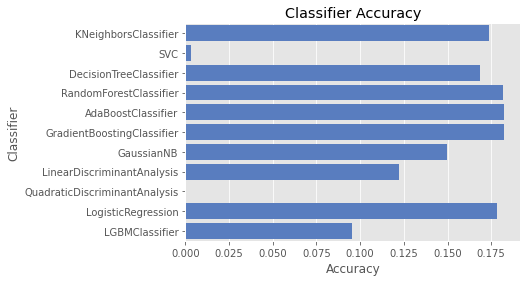

In [308]:
train_merge.reset_index(inplace=True)
X_data = train_merge.copy()
X_data.drop('target', axis=1, inplace=True)
X_data.drop('customer_ID', axis=1, inplace=True)
Y_data = train_merge['target']

train_merge.set_index('customer_ID', inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2)

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [309]:
##Some of the model can give error, if it is not listed in the classifiers above should not be consider
log.sort_values('Accuracy', ascending=False)

,Classifier,Accuracy
0,AdaBoostClassifier,0.182499
0,GradientBoostingClassifier,0.182389
0,RandomForestClassifier,0.181865
0,LogisticRegression,0.178538
0,KNeighborsClassifier,0.173782
0,DecisionTreeClassifier,0.168424
0,GaussianNB,0.149938
0,LinearDiscriminantAnalysis,0.122274
0,LGBMClassifier,0.095137
0,SVC,0.003066


In [ ]:
#Found to be best in this case is GradientBoostingClassifier

# 4. FEATURE SELECTION
### Not all features are important, I will compute the imporatnt of the features and selected the best
### In this place also, I will find out those features that are highly correlated and remove one of them
### Many method can be used to compute the feature important as you can see below, in my case I just made use of two of them for the competution

## 4.1 Run PermutationImportance using out from GradientBoostingClassifier model

In [152]:
train_merge.set_index('customer_ID', inplace=True)
train_merge.head(2)

,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,D_44mn,...,D_143_90,D_144_90,D_145_90,CL_90,CO_90,CR_90,XL_90,XM_90,XZ_90,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,0.000000,0.004673,...,0.008755,0.008033,0.009523,0.0,0.0,1.0,0.0,0.0,0.0,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.077846,0.004311,...,0.009550,0.008627,0.008380,0.0,1.0,0.0,0.0,0.0,0.0,0


In [235]:
X_data = train_merge.copy()
X_data.drop('target', axis=1, inplace=True)
Y_data = train_merge['target']

"""## Train Test Split"""
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2)


print('Size of: ')
print('Training Set x: ', x_train.shape)
print('Training Set y: ', y_train.shape)
print('Test Set x: ', x_test.shape)
print('Test Set y: ', y_test.shape)


Size of: 
Training Set x:  (1331, 1336)
Training Set y:  (1331,)
Test Set x:  (333, 1336)
Test Set y:  (333,)


In [157]:
#Calculate the percentage of data missing
((train_merge.isnull().sum()/train_merge.shape[0])*100).sort_values().tail(10)

R_25max    0.0
R_24max    0.0
D_94max    0.0
D_93max    0.0
D_92max    0.0
D_91max    0.0
R_23max    0.0
R_22max    0.0
B_33max    0.0
target     0.0
dtype: float64

In [236]:
from sklearn.ensemble import RandomForestRegressor

# train model on training set
gbc = GradientBoostingClassifier()
  
# fit model on training set
gbc.fit(x_train, y_train)

# calculate score on test set
print('R2 score for test set: ')
print(gbc.score(x_test, y_test))

R2 score for test set: 
0.8498498498498499


In [237]:
train_merge_clumns=list(train_merge.columns)
train_merge_clumns.remove('target')

In [238]:
import eli5
from eli5.sklearn import PermutationImportance
  
# create permutation importance object using model
# and fit on test set
perm = PermutationImportance(gbc, random_state=1).fit(x_test, y_test)
  


In [239]:
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = train_merge_clumns)

Weight,Feature
0.0132 ± 0.0098,D_50mn
0.0126 ± 0.0080,B_4std
0.0066 ± 0.0045,S_25mn
0.0054 ± 0.0080,R_24mn
0.0048 ± 0.0098,P_2max
0.0042 ± 0.0048,D_56max
0.0042 ± 0.0061,R_6min
0.0036 ± 0.0024,D_81std
0.0030 ± 0.0066,R_3_25
0.0030 ± 0.0000,D_144mn


In [240]:
df_fi = pd.DataFrame(dict(feature_names=train_merge_clumns,
                          feat_imp=perm.feature_importances_, 
                          std=perm.feature_importances_std_,
                          ))
df_fi = df_fi.round(4)
df_fi.sort_values('feat_imp', ascending=False).to_csv('PermutationImportance_GBC.csv')
df_fi.sort_values('feat_imp', ascending=False)


,feature_names,feat_imp,std
20,D_50mn,0.0132,0.0049
511,B_4std,0.0126,0.0040
118,S_25mn,0.0066,0.0022
112,R_24mn,0.0054,0.0040
334,P_2max,0.0048,0.0049
...,...,...,...
350,D_48max,-0.0048,0.0052
761,S_18_25,-0.0054,0.0012
684,D_48_25,-0.0060,0.0000
1093,R_16_75,-0.0066,0.0022


# 4.2. Run PermutationImportance using out from RandomForestRegressor model

In [ ]:
train_merge.set_index('customer_ID', inplace=True)
train_merge.head(2)

,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,D_44mn,...,D_143_90,D_144_90,D_145_90,CL_90,CO_90,CR_90,XL_90,XM_90,XZ_90,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,0.000000,0.004673,...,0.008755,0.008033,0.009523,0.0,0.0,1.0,0.0,0.0,0.0,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.077846,0.004311,...,0.009550,0.008627,0.008380,0.0,1.0,0.0,0.0,0.0,0.0,0


In [ ]:
X_data = train_merge.copy()
X_data.drop('target', axis=1, inplace=True)
Y_data = train_merge['target']

"""## Train Test Split"""
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2)


print('Size of: ')
print('Training Set x: ', x_train.shape)
print('Training Set y: ', y_train.shape)
print('Test Set x: ', x_test.shape)
print('Test Set y: ', y_test.shape)


Size of: 
Training Set x:  (1331, 1336)
Training Set y:  (1331,)
Test Set x:  (333, 1336)
Test Set y:  (333,)


In [ ]:
#Calculate the percentage of data missing
((train_merge.isnull().sum()/train_merge.shape[0])*100).sort_values().tail(10)

R_25max    0.0
R_24max    0.0
D_94max    0.0
D_93max    0.0
D_92max    0.0
D_91max    0.0
R_23max    0.0
R_22max    0.0
B_33max    0.0
target     0.0
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# train model on training set
rf = RandomForestRegressor()
  
# fit model on training set
rf.fit(x_train, y_train)

# calculate score on test set
print('R2 score for test set: ')
print(rf.score(x_test, y_test))

R2 score for test set: 
0.5509896776166345


In [ ]:
train_merge_clumns=list(train_merge.columns)
train_merge_clumns.remove('target')

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
  
# create permutation importance object using model
# and fit on test set
perm = PermutationImportance(rf, random_state=1).fit(x_test, y_test)
  


In [ ]:
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = train_merge_clumns)

Weight,Feature
0.0175 ± 0.0089,P_2_50
0.0146 ± 0.0106,P_2_25
0.0132 ± 0.0127,P_2mn
0.0080 ± 0.0068,P_2min
0.0076 ± 0.0087,D_89_90
0.0063 ± 0.0056,P_2_90
0.0054 ± 0.0051,R_1mn
0.0046 ± 0.0049,R_1max
0.0039 ± 0.0028,R_1_75
0.0029 ± 0.0013,R_21_90


In [ ]:
df_fi = pd.DataFrame(dict(feature_names=train_merge_clumns,
                          feat_imp=perm.feature_importances_, 
                          std=perm.feature_importances_std_,
                          ))
df_fi = df_fi.round(4)
df_fi.sort_values('feat_imp', ascending=False).to_csv('PermutationImportance_RFR.csv')
df_fi.sort_values('feat_imp', ascending=False)


,feature_names,feat_imp,std
835,P_2_50,0.0175,0.0045
668,P_2_25,0.0146,0.0053
0,P_2mn,0.0132,0.0063
167,P_2min,0.0080,0.0034
1274,D_89_90,0.0076,0.0043
...,...,...,...
799,B_40_25,-0.0009,0.0009
1112,D_93_75,-0.0010,0.0005
876,B_14_50,-0.0013,0.0005
508,B_3std,-0.0014,0.0012


## 4.3. Use Permutation feature importance
### This is use to test the important of feature, if lower than zero, it can be droped

In [203]:
#Convert the id to index
train_merge.set_index('customer_ID', inplace=True)

X_data = train_merge.copy()
X_data.drop('target', axis=1, inplace=True)
Y_data = train_merge['target']

X_data.head(2)

,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,D_44mn,...,D_141_90,D_143_90,D_144_90,D_145_90,CL_90,CO_90,CR_90,XL_90,XM_90,XZ_90
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,0.000000,0.004673,...,0.008700,0.008755,0.008033,0.009523,0.0,0.0,1.0,0.0,0.0,0.0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.077846,0.004311,...,0.009627,0.009550,0.008627,0.008380,0.0,1.0,0.0,0.0,0.0,0.0


In [139]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1664 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to 00f1aea27e2b2e8504b3c0e3c691e1ed60b16a9d6b5961b9232e2e0f1fad84b8
Columns: 1352 entries, P_2mn to XZ_90
dtypes: float64(1338), int64(2), uint8(12)
memory usage: 17.1+ MB


In [177]:
Y_data.info()

<class 'pandas.core.series.Series'>
Index: 1664 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to 00f1aea27e2b2e8504b3c0e3c691e1ed60b16a9d6b5961b9232e2e0f1fad84b8
Series name: target
Non-Null Count  Dtype
--------------  -----
1664 non-null   int64
dtypes: int64(1)
memory usage: 90.5+ KB


In [292]:
training_labels.isnull().sum().sort_values().head(10)

AttributeError: 'numpy.int64' object has no attribute 'sort_values'

In [291]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1e-2).fit(training_features, training_labels)
model.score(test_features, test_labels)

0.4848050651529472

In [ ]:
#SCore the importance of the features, the top one are the most important

#Open file to write the output
start = time.perf_counter()

import csv
with open('permutation_importance.csv', 'w') as f:
    wr = csv.writer(f)

from sklearn.inspection import permutation_importance
r = permutation_importance(model, test_features, test_labels,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        wr.writerow(f"{X_data.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        wr.writerow('\n')

#Close the file
pm_imp.close()

end = time.perf_counter()
print(f'Finished in {round(end-start, 2)} seconds') 

Finished in 887.7 seconds


In [51]:
ff = ['I am fine', 'Yoy_24', 333]
ff1=open('fff.csv','w')
wr=csv.writer(ff1)
wr.writerow(ff)
ff1.close()

In [95]:
#SCore the importance of the features, the top one are the most important

#Open file to write the output
start = time.perf_counter()

import multiprocessing

def run_permutation_important():
    pm_imp=open('permutation_importance.txt','w')
    from sklearn.inspection import permutation_importance
    r = permutation_importance(model, test_features, test_labels,
                               n_repeats=30,
                               random_state=0)

    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            pm_imp.write(f"{X_data.columns[i]:<8}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")
            pm_imp.write('\n')

    #Close the file
    pm_imp.close()

process1 = multiprocessing.Process(target=run_permutation_important)
process1.start()
end = time.perf_counter()
print(f'Finished in {round(end-start, 2)} seconds') 

Finished in 0.04 seconds


In [16]:
#print(ff)

g=open('text.txt','w')
for r in range(6):
    g.write(str(r))
    g.write('\n')
    
g.close()

In [74]:
#using multiple scorers is shown below,

pm_imp=open('permutation_importance2.txt','w')

scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(
    model, test_features, test_labels, n_repeats=30, random_state=0, scoring=scoring)

for metric in r_multi:
    pm_imp.write(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            pm_imp.write(f"    {X_data.columns[i]:<8}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")
            pm_imp.write('\n')

pm_imp.close()

In [76]:
train_merge.shape

(1664, 1107)

In [189]:
train_data.shape

(1664, 1107)

## 4.4.  Build the benchmark for feature importance using Null Importances
### In the competition I did not make use of the feature selected through Null Importances

In [69]:
##Getting the feature important
#Read data and take care of categorical features
train_data = train_merge.copy()
categorical_feats = [
    f for f in train_data.columns if train_data[f].dtype == 'object'
]

categorical_feats
for f_ in categorical_feats:
    train_data[f_], _ = pd.factorize(train_data[f_])
    # Set feature type as categorical
    train_data[f_] = train_data[f_].astype('category')

In [229]:
#Create a scoring function
#Coring function uses LightGBM in RandomForest mode fitted on the full dataset

def get_feature_importances(data, shuffle, seed=None):
    # Gather real features
    train_features = [f for f in data if f not in ['target', 'id']]
    # Go over fold and keep track of CV score (train and valid) and feature importances
    
    # Shuffle target if required
    y = data['target'].copy()
    if shuffle:
        # Here you could as well use a binomial distribution
        y = data['target'].copy().sample(frac=1.0)
    
    # Fit LightGBM in RF mode, yes it's quicker than sklearn RandomForest
    dtrain = lgb.Dataset(data[train_features], y, free_raw_data=False, silent=True)
    lgb_params = {
        'verbose': -1,
        'n_jobs': 4
    }
    
    # Fit the model
    clf = lgb.train(params=lgb_params, train_set=dtrain, num_boost_round=200, categorical_feature=categorical_feats)

    # Get feature importances
    imp_df = pd.DataFrame()
    imp_df["feature"] = list(train_features)
    imp_df["importance_gain"] = clf.feature_importance(importance_type='gain')
    imp_df["importance_split"] = clf.feature_importance(importance_type='split')
    imp_df['trn_score'] = roc_auc_score(y, clf.predict(data[train_features]))
    
    return imp_df

### Get the actual importance, i.e. without shuffling

In [230]:
# Seed the unexpected randomness of this world
np.random.seed(123)
# Get the actual importance, i.e. without shuffling
actual_imp_df = get_feature_importances(data=train_data, shuffle=False)
actual_imp_df.to_csv('importance_gain.csv')

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


### Build Null Importances distribution with suffling

In [231]:
null_imp_df = pd.DataFrame()
nb_runs = 40
import time
start = time.time()
dsp = ''
for i in range(nb_runs):
    # Get current run importances
    imp_df = get_feature_importances(data=train_data, shuffle=True)
    imp_df['run'] = i + 1 
    # Concat the latest importances with the old ones
    null_imp_df = pd.concat([null_imp_df, imp_df], axis=0)
    # Erase previous message
    for l in range(len(dsp)):
        print('\b', end='', flush=True)
    # Display current run and time used
    spent = (time.time() - start) / 60
    dsp = 'Done with %4d of %4d (Spent %5.1f min)' % (i + 1, nb_runs, spent)
    print(dsp, end='', flush=True)


null_imp_df.to_csv('importance_gain2.csv')
null_imp_df.head()

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with    1 of   80 (Spent   0.2 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with    2 of   80 (Spent   0.3 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with    3 of   80 (Spent   0.5 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with    4 of   80 (Spent   0.7 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with    5 of   80 (Spent   0.9 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with    6 of   80 (Spent   1.1 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with    7 of   80 (Spent   1.2 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with    8 of   80 (Spent   1.4 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with    9 of   80 (Spent   1.6 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   10 of   80 (Spent   1.8 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   11 of   80 (Spent   2.0 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   12 of   80 (Spent   2.2 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   13 of   80 (Spent   2.4 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   14 of   80 (Spent   2.5 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   15 of   80 (Spent   2.7 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   16 of   80 (Spent   2.9 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   17 of   80 (Spent   3.1 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   18 of   80 (Spent   3.3 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   19 of   80 (Spent   3.5 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   20 of   80 (Spent   3.6 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   21 of   80 (Spent   3.8 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   22 of   80 (Spent   4.0 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   23 of   80 (Spent   4.2 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   24 of   80 (Spent   4.4 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   25 of   80 (Spent   4.5 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   26 of   80 (Spent   4.7 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   27 of   80 (Spent   4.9 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   28 of   80 (Spent   5.0 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   29 of   80 (Spent   5.2 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   30 of   80 (Spent   5.4 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   31 of   80 (Spent   5.6 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   32 of   80 (Spent   5.8 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   33 of   80 (Spent   5.9 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   34 of   80 (Spent   6.1 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   35 of   80 (Spent   6.3 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   36 of   80 (Spent   6.5 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   37 of   80 (Spent   6.7 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   38 of   80 (Spent   6.9 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   39 of   80 (Spent   7.1 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   40 of   80 (Spent   7.5 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   41 of   80 (Spent   7.7 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   42 of   80 (Spent   7.9 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   43 of   80 (Spent   8.1 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   44 of   80 (Spent   8.2 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   45 of   80 (Spent   8.4 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   46 of   80 (Spent   8.6 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   47 of   80 (Spent   8.8 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   48 of   80 (Spent   8.9 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   49 of   80 (Spent   9.2 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   50 of   80 (Spent   9.3 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   51 of   80 (Spent   9.5 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   52 of   80 (Spent   9.7 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   53 of   80 (Spent   9.9 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   54 of   80 (Spent  10.1 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   55 of   80 (Spent  10.2 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   56 of   80 (Spent  10.4 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   57 of   80 (Spent  10.6 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   58 of   80 (Spent  10.7 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   59 of   80 (Spent  10.9 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   60 of   80 (Spent  11.1 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   61 of   80 (Spent  11.3 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   62 of   80 (Spent  11.4 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   63 of   80 (Spent  11.6 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   64 of   80 (Spent  11.8 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   65 of   80 (Spent  12.0 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   66 of   80 (Spent  12.3 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   67 of   80 (Spent  12.6 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   68 of   80 (Spent  13.0 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   69 of   80 (Spent  13.1 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   70 of   80 (Spent  13.3 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   71 of   80 (Spent  13.5 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   72 of   80 (Spent  13.7 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   73 of   80 (Spent  13.9 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   74 of   80 (Spent  14.1 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   75 of   80 (Spent  14.2 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   76 of   80 (Spent  14.4 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   77 of   80 (Spent  14.6 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   78 of   80 (Spent  14.9 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   79 of   80 (Spent  15.1 min)

/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'
/home/adebayo/miniconda3/lib/python3.8/site-packages/lightgbm/basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


Done with   80 of   80 (Spent  15.2 min)

,feature,importance_gain,importance_split,trn_score,run
0,P_2mn,0.006491,2,1.0,1
1,D_39mn,0.000000,0,1.0,1
2,B_1mn,0.125370,1,1.0,1
3,B_2mn,0.107342,3,1.0,1
4,R_1mn,0.848617,4,1.0,1


## 4.5. Select highly correlated features to be dropped 

In [43]:
# Remove highly correlated features.
train_without_target=train_merge.drop(['target'],axis=1)
cor_matrix = train_without_target.corr().abs()
#Select the upper matrix, or the lower one using: np.tril(np.ones(cor_matrix.shape), k=-1)
upper_tri = cor_matrix.where((np.triu(np.ones(cor_matrix.shape), k=1)).astype(bool))
#Drop out columns with absolute correlation of more than 90%
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
train_drop_highcorr=train_without_target.drop(to_drop,axis=1)
train_drop_highcorr.shape


(1664, 586)

In [5]:
upper_tri

NameError: name 'upper_tri' is not defined

In [45]:
#Save the list to file
pd.Series(list(to_drop)).to_csv('to_drop.csv')

# 5. Select the important variables in the two permutation_importance files created above

### For the finale selected features, all features that are shown to be important at least higher than zero were selected
### And all that are highly correlatted (in the saved file to_drop) were droped from them

In [6]:

# Check the three saved feature important files namely "permutation_importance.txt", "permutation_importance.txt", "importance_gain.csv", and create a variable file of the selected CV separated by commer only as "sel_features.cvs"

#The most important is the two permutation_importance files created above contain only the important features only
## The importance_gain.csv contains all the variables, You can also make use of the top variables in importance_gain (importance_gain contains all the variables not just the important one)
# ### You can select the tope after sorting

sel_feature_label = list(pd.read_csv('sel_features2.cvs'))

# 6. MODEL BUILDING


# 6.1 Using Light Gradient Boosted Machine (LightGBM) Ensemble

In [3]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier

In [4]:
train_merge.head()

,customer_ID,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,...,D_143_90,D_144_90,D_145_90,CL_90,CO_90,CR_90,XL_90,XM_90,XZ_90,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,0.000000,...,0.008755,0.008033,0.009523,0.0,0.0,1.0,0.0,0.0,0.0,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.077846,...,0.009550,0.008627,0.008380,0.0,1.0,0.0,0.0,0.0,0.0,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878454,0.004181,0.004386,0.815677,0.006621,0.000000,0.006842,0.005493,0.000000,...,0.007712,0.009228,0.006686,0.0,1.0,0.0,0.0,0.0,0.0,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.598969,0.048862,0.059876,0.955264,0.005665,0.247750,0.005490,0.006423,0.061026,...,0.009757,0.007805,0.009358,0.0,1.0,0.0,0.0,0.0,0.0,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891679,0.004644,0.005941,0.814543,0.004180,0.053262,0.005352,0.005088,0.048778,...,0.007879,0.007280,0.009555,0.0,1.0,0.0,0.0,0.0,0.0,0


In [43]:
train_merge = reduce_mem_usage(train_merge)
X_data = train_merge[sel_feature_label]
Y_data = train_merge['target']

"""## Train Test Split"""
training_features , test_features ,training_labels, test_labels = train_test_split(X_data , Y_data , test_size=0.2)

Memory usage after optimization is: 4.24 MB
Decreased by 0.0%


In [46]:
#Model
model_lgbm = LGBMClassifier(n_estimators=500, max_depth=5, num_leaves=2**5)
# fit the model on the whole dataset
model_lgbm.fit(training_features, training_labels)


LGBMClassifier(max_depth=5, n_estimators=500, num_leaves=32)

In [47]:
#Predict
train_predictions = model_lgbm.predict(training_features)
test_predictions = model_lgbm.predict(test_features)


In [48]:
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_lgbm, training_features, training_labels, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

KeyboardInterrupt: 

In [15]:
train_predictions

array([0, 0, 0, ..., 0, 1, 0])

In [49]:
"""## Validation"""
train_predictions_log_series = pd.Series(train_predictions)
test_predictions_log_series = pd.Series(test_predictions)

train_predictions_log_df = pd.DataFrame(train_predictions_log_series, columns=['prediction'])
test_predictions_log_df = pd.DataFrame(test_predictions_log_series, columns=['prediction'])

training_labels.reset_index(drop=True, inplace=True)
train_predictions_log_df.reset_index(drop=True, inplace=True)

test_labels.reset_index(drop=True, inplace=True)
test_predictions_log_df.reset_index(drop=True, inplace=True)

train_labels_with_predictions_log_df = pd.concat([training_labels, train_predictions_log_df], axis=1)
test_labels_with_predictions_log_df = pd.concat([test_labels, test_predictions_log_df], axis=1)

In [51]:
training_labels

0       0
1       0
2       0
3       0
4       0
       ..
1326    1
1327    1
1328    0
1329    0
1330    0
Name: target, Length: 1331, dtype: int8

In [50]:

def calculate_binary_class_scores(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred.astype('int64'))
  precision = precision_score(y_true, y_pred.astype('int64'))
  recall = recall_score(y_true, y_pred.astype('int64'))
  return accuracy, precision, recall

train_accuracy_score, train_precision_score, train_recall_score = calculate_binary_class_scores(training_labels, train_predictions_log_series)
test_accuracy_score, test_precision_score, test_recall_score = calculate_binary_class_scores(test_labels, test_predictions_log_series)

print('Training Data Accuracy (%) = ', round(train_accuracy_score*100,2))
print('Training Data Precision (%) = ', round(train_precision_score*100,2))
print('Training Data Recall (%) = ', round(train_recall_score*100,2))
print('-'*50)
print('Test Data Accuracy (%) = ', round(test_accuracy_score*100,2))
print('Test Data Precision (%) = ', round(test_precision_score*100,2))
print('Test Data Recall (%) = ', round(test_recall_score*100,2))


Training Data Accuracy (%) =  100.0
Training Data Precision (%) =  100.0
Training Data Recall (%) =  100.0
--------------------------------------------------
Test Data Accuracy (%) =  86.79
Test Data Precision (%) =  80.0
Test Data Recall (%) =  75.25


### 6.1.1 Applying Calibrated Classification to LightGBM prediction

In [7]:
# Check the three saved feature important files namely "permutation_importance.txt", "permutation_importance.txt", "importance_gain.csv", and create a variable file of the selected CV separated by commer only as "sel_features.cvs"

#The most important is the two permutation_importance files created above contain only the important features only
## The importance_gain.csv contains all the variables, You can also make use of the top variables in importance_gain (importance_gain contains all the variables not just the important one)
# ### You can select the tope after sorting

sel_feature_label = list(pd.read_csv('sel_features2.cvs'))

#Load the parquet format data
train_merge = pd.read_parquet('train_merge_filtered.parquet')

In [60]:

#Check out the tutorial details at https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/

from sklearn.datasets import make_classification
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from lightgbm import LGBMClassifier
# predict uncalibrated probabilities
def uncalibrated(trainX, testX, trainy):
	# fit a model
	model = LGBMClassifier(n_estimators=500, max_depth=5, num_leaves=2**5)
	model.fit(trainX, trainy)
	# predict probabilities
	return model, model.predict_proba(trainX)[:, 1], model.predict_proba(testX)[:, 1]

# predict calibrated probabilities
def calibrated(trainX, testX, trainy):
	# define model
	model = LGBMClassifier(n_estimators=500, max_depth=5, num_leaves=2**5)
	# define and fit calibration model
	calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
	calibrated.fit(trainX, trainy)
	# predict probabilities
	return calibrated, calibrated.predict_proba(trainX)[:, 1], calibrated.predict_proba(testX)[:, 1]


#Note that for some model, probabilities can be predicted by calling the decision_function() function on the fit model 
#instead of the usual predict_proba() function. The probabilities when you use decision_function() are not normalized, 
#but can be normalized when calling the calibration_curve() function by setting the ‘normalize‘ argument to ‘True‘.
#e.g calibration_curve(test_labels, yhat_uncalibrated, n_bins=10, normalize=True)

In [61]:
X_data = train_merge[sel_feature_label]
Y_data = train_merge['target']

X_data.shape

(1664, 398)

In [63]:
"""## Train Test Split"""
training_features , test_features ,training_labels, test_labels = train_test_split(X_data , Y_data , test_size=0.2)


In [121]:
X_data

,D_69mn,D_69_90,R_14std,R_14max,B_26std,D_69_75,D_69std,B_21mn,R_14mn,B_26max,...,D_54std,CLmax,B_24max,R_27_25,D_145_25,D_43min,S_8max,R_3std,B_41std,CO_50
0,0.005276,0.008781,0.002731,0.008781,0.003544,0.007435,0.002819,0.005501,0.005878,0.009193,...,0.003399,0,0.009720,1.002930,0.002674,0.000000,1.001953,0.003269,0.002213,0.0
1,0.005871,0.008186,0.003578,0.009895,0.003468,0.007637,0.002151,0.005497,0.005676,0.009842,...,0.002689,0,0.009628,1.001953,0.002628,0.000000,0.763672,0.052155,0.002958,1.0
2,0.006039,0.009666,0.002535,0.008667,0.002327,0.008408,0.003141,0.004414,0.005070,0.009857,...,0.002813,0,0.009941,1.002930,0.003445,0.000000,0.009521,0.002645,0.003309,1.0
3,0.005013,0.009415,0.003101,0.009979,0.001942,0.006428,0.003176,0.005547,0.005833,0.009422,...,0.002565,0,0.008797,1.003906,0.002983,0.006634,0.481201,0.064209,0.002628,1.0
4,0.005058,0.008774,0.002235,0.009026,0.002407,0.008179,0.003185,0.005642,0.005333,0.009659,...,0.003017,0,0.009682,1.003906,0.001624,0.036987,0.330078,0.037994,0.002998,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,0.004562,0.007774,0.002985,0.009460,0.118835,0.006630,0.002747,0.005268,0.006199,0.275146,...,0.439941,0,0.009911,1.001953,0.001942,0.145508,0.327393,0.155273,0.002224,1.0
1660,0.005085,0.005085,0.000000,0.007141,0.000000,0.005085,0.000000,0.001276,0.007141,0.009285,...,0.000000,0,0.001514,0.000000,0.005722,0.000000,1.015625,0.000000,0.000000,1.0
1661,0.005470,0.009377,0.003155,0.009911,0.003450,0.008560,0.003345,0.005466,0.004688,0.009766,...,0.002935,0,0.008904,0.031952,0.002550,0.000000,0.494873,0.002924,0.003527,1.0
1662,0.004932,0.008972,0.002094,0.009911,0.002634,0.007896,0.003115,0.005119,0.005337,0.008575,...,0.003355,0,0.007835,1.002930,0.005615,0.000000,1.017578,0.001944,0.002199,0.0


In [116]:
Y_data

0       0
1       0
2       0
3       0
4       0
       ..
1659    1
1660    0
1661    0
1662    0
1663    0
Name: target, Length: 1664, dtype: int8

In [69]:
training_labels2

0       1
1       1
2       1
3       1
4       0
       ..
1326    1
1327    0
1328    1
1329    1
1330    0
Name: target, Length: 1331, dtype: int64

In [64]:
# uncalibrated predictions
model_uncal, train_predictions_uncal, test_predictions_uncal = uncalibrated(training_features, test_features, training_labels)

# calibrated predictions
model_cal, train_predictions_cal, test_predictions_cal = calibrated(training_features, test_features, training_labels)


In [65]:
test_features.shape

(333, 398)

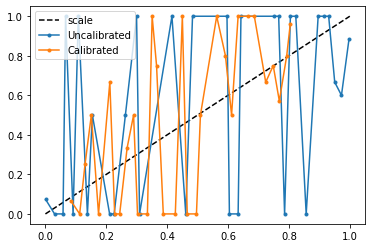

In [66]:
# reliability diagrams
fop_uncalibrated, mpv_uncalibrated = calibration_curve(test_labels, test_predictions_uncal, n_bins=50)
fop_calibrated, mpv_calibrated = calibration_curve(test_labels, test_predictions_cal, n_bins=50)
# plot perfectly calibrated
plt.plot(test_labels, test_labels, linestyle='--', color='black')
# plot model reliabilities
plt.plot(mpv_uncalibrated, fop_uncalibrated, marker='.')
plt.plot(mpv_calibrated, fop_calibrated, marker='.')
plt.legend(['scale', 'Uncalibrated', 'Calibrated'])
plt.show()

In [98]:

test_predictions_calibrated_series2 = [
    1 if prob >= 0.339 else 0 for prob in np.ravel(test_predictions_cal)
]

test_predictions_uncalibrated_series2 = [
    1 if prob >= 0.262 else 0 for prob in np.ravel(test_predictions_uncal)
]

train_predictions_calibrated_series2 = [
    1 if prob >= 0.339 else 0 for prob in np.ravel(train_predictions_cal)
]

train_predictions_uncalibrated_series2 = [
    1 if prob >= 0.262 else 0 for prob in np.ravel(train_predictions_uncal)
]

In [68]:
pd.Series(test_predictions_uncalibrated_series2).shape

(333,)

In [101]:
# search thresholds for imbalanced classification
#For detail check https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

from numpy import arange
from numpy import argmax
from sklearn.metrics import f1_score
 
    
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')


# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(test_labels, to_labels(test_predictions_cal, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold for calibrated=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold for calibrated=0.339, F-Score=0.80612


In [97]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.metrics import f1_score
 
    
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')


# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(test_labels, to_labels(test_predictions_uncal, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold for uncalibrated=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))


Threshold for uncalibrated=0.262, F-Score=0.80412


In [85]:
test_xx = model_cal.predict_proba(test_features)[:, 1]
test_xx2 = [
    1 if prob >= 0.5 else 0 for prob in np.ravel(test_xx)
]
pd.Series(test_xx2).shape
pd.Series(test_xx2).to_csv('ss1.csv')
pd.Series(test_predictions_uncalibrated_series2).to_csv('ss2.csv')

In [86]:
test_xx

array([0.08299072, 0.36581581, 0.21634843, 0.08688725, 0.08299063,
       0.08299063, 0.08319819, 0.74122344, 0.08299069, 0.08299064,
       0.4498755 , 0.08299064, 0.08299063, 0.80488026, 0.22750288,
       0.08299063, 0.08299064, 0.08299077, 0.80489133, 0.0840556 ,
       0.56145636, 0.08299062, 0.08299076, 0.24320332, 0.08305431,
       0.08299065, 0.08299063, 0.08299094, 0.08303921, 0.63264249,
       0.08365803, 0.08299088, 0.08299065, 0.08299064, 0.36172314,
       0.75043255, 0.08359832, 0.35064913, 0.78844471, 0.8049125 ,
       0.80491709, 0.7694814 , 0.80488919, 0.08299744, 0.80191798,
       0.80331214, 0.08299063, 0.58175694, 0.08299063, 0.08299063,
       0.08299063, 0.08299066, 0.10986178, 0.08299077, 0.08299062,
       0.08303626, 0.80491716, 0.09298466, 0.08299111, 0.08299073,
       0.08299063, 0.80491741, 0.08299063, 0.33850216, 0.08299062,
       0.08299063, 0.08299072, 0.08299078, 0.08299155, 0.08299063,
       0.08301486, 0.0829912 , 0.24485084, 0.0951304 , 0.08299

In [71]:
test_predictions_uncal

array([1.41427087e-07, 6.40375379e-01, 1.62387305e-02, 1.47884470e-02,
       4.49556190e-10, 1.65017412e-09, 2.06361678e-03, 9.29491029e-01,
       1.03496817e-07, 2.20744784e-08, 7.66369850e-01, 2.31299044e-08,
       2.48517055e-09, 9.99930165e-01, 3.50385113e-02, 8.41696159e-09,
       1.92133286e-07, 2.02973518e-06, 9.99773718e-01, 3.61849462e-04,
       9.80131706e-01, 2.11817918e-10, 1.31357675e-07, 2.10898859e-01,
       9.61845414e-05, 3.03855089e-09, 2.74860811e-09, 2.99217949e-07,
       3.47014862e-05, 9.36974173e-01, 9.00285734e-04, 1.27109234e-09,
       3.53200102e-08, 9.34961738e-08, 7.50983660e-01, 8.04902387e-01,
       7.91918912e-04, 1.00100193e-01, 9.97859452e-01, 9.99999315e-01,
       9.99999866e-01, 9.33632007e-01, 9.99987684e-01, 3.93153034e-06,
       9.98429641e-01, 9.99342158e-01, 8.75107373e-08, 8.95384874e-01,
       3.27967399e-10, 3.63334135e-09, 4.47877783e-09, 2.53401402e-08,
       1.40820288e-03, 3.33812259e-07, 8.78627345e-11, 6.29983982e-06,
      

In [99]:
"""Reformat the labels """
training_labels2 = pd.Series(training_labels, name='target')
test_labels2 = pd.Series(test_labels, name='target')

"""## Validation"""
train_predictions_calibrated_series = pd.Series(train_predictions_calibrated_series2)
test_predictions_calibrated_series = pd.Series(test_predictions_calibrated_series2)

train_predictions_uncalibrated_series = pd.Series(train_predictions_uncalibrated_series2)
test_predictions_uncalibrated_series = pd.Series(test_predictions_uncalibrated_series2)

train_predictions_calibrated_df = pd.DataFrame(train_predictions_calibrated_series, columns=['prediction'])
test_predictions_calibrated_df = pd.DataFrame(test_predictions_calibrated_series, columns=['prediction'])

train_predictions_uncalibrated_df = pd.DataFrame(train_predictions_uncalibrated_series, columns=['prediction'])
test_predictions_uncalibrated_df = pd.DataFrame(test_predictions_uncalibrated_series, columns=['prediction'])

training_labels2.reset_index(drop=True, inplace=True)
train_predictions_calibrated_df.reset_index(drop=True, inplace=True)
train_predictions_uncalibrated_df.reset_index(drop=True, inplace=True)

test_labels2.reset_index(drop=True, inplace=True)
test_predictions_calibrated_df.reset_index(drop=True, inplace=True)
test_predictions_uncalibrated_df.reset_index(drop=True, inplace=True)

train_labels_with_predictions_calibrated_df = pd.concat([training_labels2, train_predictions_calibrated_df], axis=1)
test_labels_with_predictions_calibrated_df = pd.concat([test_labels2, test_predictions_calibrated_df], axis=1)

train_labels_with_predictions_uncalibrated_df = pd.concat([training_labels2, train_predictions_uncalibrated_df], axis=1)
test_labels_with_predictions_uncalibrated_df = pd.concat([test_labels2, test_predictions_uncalibrated_df], axis=1)

In [100]:

def calculate_binary_class_scores(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred.astype('int64'))
  precision = precision_score(y_true, y_pred.astype('int64'))
  recall = recall_score(y_true, y_pred.astype('int64'))
  return accuracy, precision, recall

train_accuracy_score_cal, train_precision_score_cal, train_recall_score_cal = calculate_binary_class_scores(training_labels2, train_predictions_uncalibrated_series)
test_accuracy_score_cal, test_precision_score_cal, test_recall_score_cal = calculate_binary_class_scores(test_labels2, test_predictions_calibrated_series)

train_accuracy_score_uncal, train_precision_score_uncal, train_recall_score_uncal = calculate_binary_class_scores(training_labels2, train_predictions_calibrated_series)
test_accuracy_score_uncal, test_precision_score_uncal, test_recall_score_uncal = calculate_binary_class_scores(test_labels2, test_predictions_uncalibrated_series)

print('Training Data Accuracy  Calibrated (%) = ', round(train_accuracy_score_cal*100,2))
print('Training Data Precision Calibrated (%) = ', round(train_precision_score_cal*100,2))
print('Training Data Recall Calibrated (%) = ', round(train_recall_score_cal*100,2))
print('-'*50)
print('Test Data Accuracy Calibrated (%) = ', round(test_accuracy_score_cal*100,2))
print('Test Data Precision Calibrated (%) = ', round(test_precision_score_cal*100,2))
print('Test Data Recall Calibrated (%) = ', round(test_recall_score_cal*100,2))
print('-'*50)
print('Training Data Accuracy UnCalibrated (%) = ', round(train_accuracy_score_uncal*100,2))
print('Training Data Precision UnCalibrated (%) = ', round(train_precision_score_uncal*100,2))
print('Training Data Recall UnCalibrated (%) = ', round(train_recall_score_uncal*100,2))
print('-'*50)
print('Test Data Accuracy UnCalibrated (%) = ', round(test_accuracy_score_uncal*100,2))
print('Test Data Precision UnCalibrated (%) = ', round(test_precision_score_uncal*100,2))
print('Test Data Recall UnCalibrated (%) = ', round(test_recall_score_uncal*100,2))



Training Data Accuracy  Calibrated (%) =  100.0
Training Data Precision Calibrated (%) =  100.0
Training Data Recall Calibrated (%) =  100.0
--------------------------------------------------
Test Data Accuracy Calibrated (%) =  88.59
Test Data Precision Calibrated (%) =  81.44
Test Data Recall Calibrated (%) =  79.8
--------------------------------------------------
Training Data Accuracy UnCalibrated (%) =  100.0
Training Data Precision UnCalibrated (%) =  100.0
Training Data Recall UnCalibrated (%) =  100.0
--------------------------------------------------
Test Data Accuracy UnCalibrated (%) =  88.59
Test Data Precision UnCalibrated (%) =  82.11
Test Data Recall UnCalibrated (%) =  78.79


In [22]:
train_labels_with_predictions_uncalibrated_df.shape

(1331, 2)

In [76]:
#Load the parquet format data
test_merge = pd.read_parquet('test_data_merge_filtered.parquet')
sel_feature_label = list(pd.read_csv('sel_features2.cvs'))
test_X_data = test_merge[sel_feature_label]

test_X_data.shape

(1619, 398)

In [77]:
test_X_predictions_cal = model_cal.predict_proba(test_X_data)
test_X_predictions_uncal = model_uncal.predict_proba(test_X_data)

In [78]:
test_X_predictions_uncalibrated_series = [
    1 if prob >= 0.5 else 0 for prob in np.ravel(test_X_predictions_uncal)
]

test_X_predictions_calibrated_series = [
    1 if prob >= 0.5 else 0 for prob in np.ravel(test_X_predictions_cal)
]

In [79]:
pd.Series(np.ravel(test_X_predictions_uncal)).shape

(3238,)

array([9.99965120e-01, 3.48802359e-05, 9.99999993e-01, ...,
       4.61626198e-06, 9.99999993e-01, 6.64789308e-09])

In [80]:
test_X_data.reset_index(inplace=True)
test_name= test_X_data['customer_ID']

In [81]:
"""## Validation"""
test_X_predictions_calibrated_series = pd.Series(test_X_predictions_calibrated_series)
test_X_predictions_uncalibrated_series = pd.Series(test_X_predictions_uncalibrated_series)

test_X_predictions_calibrated_df = pd.DataFrame(test_X_predictions_calibrated_series, columns=['prediction'])
test_X_predictions_uncalibrated_df = pd.DataFrame(test_X_predictions_uncalibrated_series, columns=['prediction'])

test_name.reset_index(drop=True, inplace=True)
test_X_predictions_calibrated_df.reset_index(drop=True, inplace=True)
test_X_predictions_uncalibrated_df.reset_index(drop=True, inplace=True)


test_X_labels_with_predictions_calibrated_df = pd.concat([test_name, test_X_predictions_calibrated_df], axis=1)
test_X_labels_with_predictions_uncalibrated_df = pd.concat([test_name, test_X_predictions_uncalibrated_df], axis=1)

#Save with no index
test_X_labels_with_predictions_calibrated_df.to_csv("sample_submission_lgbm_cc_calibrated.csv", index=False)
test_X_labels_with_predictions_uncalibrated_df.to_csv("sample_submission_lgbm_cc_uncalibrated.csv", index=False)

print(test_X_labels_with_predictions_calibrated_df.head(10))
print('-'*5)
print(test_X_labels_with_predictions_uncalibrated_df.head(10))

                                         customer_ID  prediction
0  00000469ba478561f23a92a868bd366de6f6527a684c9a...           1
1  00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...           0
2  0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...           1
3  00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...           0
4  00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...           1
5  00004ffe6e01e1b688170bbd108da8351bc4c316eacfef...           0
6  00007cfcce97abfa0b4fa0647986157281d01d3ab90de9...           0
7  000089cc2a30dad8e6ba39126f9d86df6088c9f975093a...           1
8  00008f50a1dd76fa211ba36a2b0d5a1b201e4134a5fd53...           0
9  0000b48a4f27dc1d61e78d081678e811620300b88eb3ab...           1
-----
                                         customer_ID  prediction
0  00000469ba478561f23a92a868bd366de6f6527a684c9a...           1
1  00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...           0
2  0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...           1
3  00003b41e58ede33

### Safe raw probability values without changing it to 0 and 1

In [83]:
#Safe raw probability values without changing it to 0 and 1
"""## Validation"""
test_X_predictions_calibrated_series = pd.Series(np.ravel(test_X_predictions_uncal))
test_X_predictions_uncalibrated_series = pd.Series(np.ravel(test_X_predictions_uncal))

test_X_predictions_calibrated_df = pd.DataFrame(test_X_predictions_calibrated_series, columns=['prediction'])
test_X_predictions_uncalibrated_df = pd.DataFrame(test_X_predictions_uncalibrated_series, columns=['prediction'])

test_name.reset_index(drop=True, inplace=True)
test_X_predictions_calibrated_df.reset_index(drop=True, inplace=True)
test_X_predictions_uncalibrated_df.reset_index(drop=True, inplace=True)


test_X_labels_with_predictions_calibrated_df = pd.concat([test_name, test_X_predictions_calibrated_df], axis=1)
test_X_labels_with_predictions_uncalibrated_df = pd.concat([test_name, test_X_predictions_uncalibrated_df], axis=1)

#Save with no index
test_X_labels_with_predictions_calibrated_df.to_csv("sample_submission_lgbm_cc_calibrated_raw.csv", index=False)
test_X_labels_with_predictions_uncalibrated_df.to_csv("sample_submission_lgbm_cc_uncalibrated_raw.csv", index=False)

print(test_X_labels_with_predictions_calibrated_df.head(10))
print('-'*5)
print(test_X_labels_with_predictions_uncalibrated_df.head(10))

                                         customer_ID    prediction
0  00000469ba478561f23a92a868bd366de6f6527a684c9a...  9.999651e-01
1  00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...  3.488024e-05
2  0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...  1.000000e+00
3  00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...  6.683014e-09
4  00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...  9.999999e-01
5  00004ffe6e01e1b688170bbd108da8351bc4c316eacfef...  8.994663e-08
6  00007cfcce97abfa0b4fa0647986157281d01d3ab90de9...  3.909062e-02
7  000089cc2a30dad8e6ba39126f9d86df6088c9f975093a...  9.609094e-01
8  00008f50a1dd76fa211ba36a2b0d5a1b201e4134a5fd53...  5.595786e-02
9  0000b48a4f27dc1d61e78d081678e811620300b88eb3ab...  9.440421e-01
-----
                                         customer_ID    prediction
0  00000469ba478561f23a92a868bd366de6f6527a684c9a...  9.999651e-01
1  00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...  3.488024e-05
2  0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...  1.

### Apply the computed threshold to convert the saved raw probability values to 0 and 1

In [112]:
#Use the thresshold computed to convert the probability values saved
import pandas as pd
test_uncal_prob=pd.read_csv('sample_submission_lgbm_cc_uncalibrated_raw.csv')
test_uncal_prob_label=test_uncal_prob['customer_ID']
test_uncal_prob_val=test_uncal_prob['prediction']

test_cal_prob=pd.read_csv('sample_submission_lgbm_cc_calibrated_raw.csv')
test_cal_prob_label=test_uncal_prob['customer_ID']
test_cal_prob_val=test_uncal_prob['prediction']


test_uncal_prob_val_series = [
    1 if prob >= 0.4 else 0 for prob in np.ravel(test_uncal_prob_val)
]

test_cal_prob_val_series = [
    1 if prob >= 0.4 else 0 for prob in np.ravel(test_cal_prob_val)
]


In [111]:
#Safe raw probability values without changing it to 0 and 1
"""## Validation"""
test_X_predictions_calibrated_series = pd.Series(test_cal_prob_val_series)
test_X_predictions_uncalibrated_series = pd.Series(test_uncal_prob_val_series)

test_X_predictions_calibrated_df = pd.DataFrame(test_X_predictions_calibrated_series, columns=['prediction'])
test_X_predictions_uncalibrated_df = pd.DataFrame(test_X_predictions_uncalibrated_series, columns=['prediction'])

test_uncal_prob_label.reset_index(drop=True, inplace=True)
test_cal_prob_label.reset_index(drop=True, inplace=True)
test_X_predictions_calibrated_df.reset_index(drop=True, inplace=True)
test_X_predictions_uncalibrated_df.reset_index(drop=True, inplace=True)


test_X_labels_with_predictions_calibrated_df = pd.concat([test_cal_prob_label, test_X_predictions_calibrated_df], axis=1)
test_X_labels_with_predictions_uncalibrated_df = pd.concat([test_uncal_prob_label, test_X_predictions_uncalibrated_df], axis=1)

#Save with no index
test_X_labels_with_predictions_calibrated_df.to_csv("sample_submission_lgbm_cc_calibrated_threshold.csv", index=False)
test_X_labels_with_predictions_uncalibrated_df.to_csv("sample_submission_lgbm_cc_uncalibrated_threshold.csv", index=False)

print(test_X_labels_with_predictions_calibrated_df.head(10))
print('-'*5)
print(test_X_labels_with_predictions_uncalibrated_df.head(10))

                                         customer_ID  prediction
0  00000469ba478561f23a92a868bd366de6f6527a684c9a...           1
1  00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...           0
2  0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...           1
3  00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...           0
4  00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...           1
5  00004ffe6e01e1b688170bbd108da8351bc4c316eacfef...           0
6  00007cfcce97abfa0b4fa0647986157281d01d3ab90de9...           0
7  000089cc2a30dad8e6ba39126f9d86df6088c9f975093a...           1
8  00008f50a1dd76fa211ba36a2b0d5a1b201e4134a5fd53...           0
9  0000b48a4f27dc1d61e78d081678e811620300b88eb3ab...           1
-----
                                         customer_ID  prediction
0  00000469ba478561f23a92a868bd366de6f6527a684c9a...           1
1  00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...           0
2  0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...           1
3  00003b41e58ede33

## 6.1.2 Predict the test Light Gradient Boosted Machine (LightGBM) model

In [159]:
#Load the parquet format data
test_merge = pd.read_parquet('test_data_merge_filtered.parquet')
sel_feature_label = list(pd.read_csv('sel_features2.cvs'))
test_X_data = test_merge[sel_feature_label]

test_X_predictions = model_lgbm.predict(test_X_data)

In [160]:
test_X_predictions_fl = model_lgbm.predict(test_X_data).flatten()

In [164]:
test_X_predictions2 = pd.DataFrame(test_X_predictions, columns=['prediction'])
test_X_predictions2.head(10)

,prediction
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,0
8,1
9,0


In [165]:
test_X_predictions_fl2 = pd.DataFrame(test_X_predictions_fl, columns=['prediction'])
test_X_predictions_fl2.head(10)

,prediction
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,0
8,1
9,0


In [141]:
test_X_predictions

array([[0.91535863, 0.08464137],
       [0.91535884, 0.08464116],
       [0.91535884, 0.08464116],
       ...,
       [0.91535766, 0.08464234],
       [0.91535215, 0.08464785],
       [0.9153588 , 0.0846412 ]])

In [234]:
test_X_predictions_log_df2 = pd.DataFrame(test_X_predictions, columns=['prediction'])

test_X_data.reset_index(inplace=True)
test_name= test_X_data['customer_ID']
test_X_labels_with_predictions_log_df2 = pd.concat([test_name, test_X_predictions_log_df2], axis=1)

#Save with no index
test_X_labels_with_predictions_log_df2.to_csv("sample_submission_lgbm.csv", index=False)

test_X_labels_with_predictions_log_df2.head(10)

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,1
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0
5,00004ffe6e01e1b688170bbd108da8351bc4c316eacfef...,0
6,00007cfcce97abfa0b4fa0647986157281d01d3ab90de9...,1
7,000089cc2a30dad8e6ba39126f9d86df6088c9f975093a...,0
8,00008f50a1dd76fa211ba36a2b0d5a1b201e4134a5fd53...,1
9,0000b48a4f27dc1d61e78d081678e811620300b88eb3ab...,0


In [53]:
#Correlate all the data and check their correlation with the target

#Correlation per each varaible
#train_cor=train_data[cols].corr()['target_x'].abs().sort_values()

#Save the correclation to file
train_merge.corr()['target'].abs().sort_values().to_csv('train_cor.csv')

In [6]:
#Load the parquet format data
#train_data = pd.read_parquet('../input/american-express-default-prediction-snappy-parquet/train_data.snappy.parquet')


#train_labels = pd.read_parquet('../input/american-express-default-prediction-snappy-parquet/train_labels.snappy.parquet')


# 6.2. Using GradientBoostingClassifier Ensemble

In [209]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [208]:
train_merge.head()

,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,D_44mn,...,D_143_90,D_144_90,D_145_90,CL_90,CO_90,CR_90,XL_90,XM_90,XZ_90,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.933594,0.010704,0.012009,1.004883,0.004509,0.113220,0.005020,0.006454,0.000000,0.004673,...,0.008759,0.008034,0.009521,0.0,0.0,1.0,0.0,0.0,0.0,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.899902,0.215210,0.025650,0.991211,0.006245,0.120605,0.004993,0.005665,0.077820,0.004311,...,0.009552,0.008629,0.008377,0.0,1.0,0.0,0.0,0.0,0.0,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.878418,0.004181,0.004387,0.815918,0.006622,0.000000,0.006844,0.005493,0.000000,0.013901,...,0.007713,0.009224,0.006687,0.0,1.0,0.0,0.0,0.0,0.0,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.599121,0.048859,0.059875,0.955078,0.005665,0.247803,0.005489,0.006424,0.061035,0.005245,...,0.009758,0.007805,0.009361,0.0,1.0,0.0,0.0,0.0,0.0,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.891602,0.004642,0.005939,0.814453,0.004181,0.053253,0.005352,0.005089,0.048767,0.003551,...,0.007881,0.007278,0.009552,0.0,1.0,0.0,0.0,0.0,0.0,0


In [241]:
train_merge = reduce_mem_usage(train_merge)
sel_feature_label = list(pd.read_csv('sel_features_gbc.cvs'))

X_data = train_merge[sel_feature_label]
Y_data = train_merge['target']

"""## Train Test Split"""
training_features , test_features ,training_labels, test_labels = train_test_split(X_data , Y_data , test_size=0.2)

Memory usage after optimization is: 4.30 MB
Decreased by 0.0%


In [242]:
#Model
model_gbc = GradientBoostingClassifier()
# fit the model on the whole dataset
model_gbc.fit(training_features, training_labels)


GradientBoostingClassifier()

In [243]:
#Predict
train_predictions = model_gbc.predict(training_features)
test_predictions = model_gbc.predict(test_features)


In [214]:
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_gbc, training_features, training_labels, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.861 (0.031)


In [15]:
train_predictions

array([0, 0, 0, ..., 0, 1, 0])

In [244]:
"""## Validation"""
train_predictions_log_series = pd.Series(train_predictions)
test_predictions_log_series = pd.Series(test_predictions)

train_predictions_log_df = pd.DataFrame(train_predictions_log_series, columns=['prediction'])
test_predictions_log_df = pd.DataFrame(test_predictions_log_series, columns=['prediction'])

training_labels.reset_index(drop=True, inplace=True)
train_predictions_log_df.reset_index(drop=True, inplace=True)

test_labels.reset_index(drop=True, inplace=True)
test_predictions_log_df.reset_index(drop=True, inplace=True)

train_labels_with_predictions_log_df = pd.concat([training_labels, train_predictions_log_df], axis=1)
test_labels_with_predictions_log_df = pd.concat([test_labels, test_predictions_log_df], axis=1)

In [245]:

def calculate_binary_class_scores(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred.astype('int64'))
  precision = precision_score(y_true, y_pred.astype('int64'))
  recall = recall_score(y_true, y_pred.astype('int64'))
  return accuracy, precision, recall

train_accuracy_score, train_precision_score, train_recall_score = calculate_binary_class_scores(training_labels, train_predictions_log_series)
test_accuracy_score, test_precision_score, test_recall_score = calculate_binary_class_scores(test_labels, test_predictions_log_series)

print('Training Data Accuracy (%) = ', round(train_accuracy_score*100,2))
print('Training Data Precision (%) = ', round(train_precision_score*100,2))
print('Training Data Recall (%) = ', round(train_recall_score*100,2))
print('-'*50)
print('Test Data Accuracy (%) = ', round(test_accuracy_score*100,2))
print('Test Data Precision (%) = ', round(test_precision_score*100,2))
print('Test Data Recall (%) = ', round(test_recall_score*100,2))


Training Data Accuracy (%) =  98.87
Training Data Precision (%) =  99.44
Training Data Recall (%) =  96.49
--------------------------------------------------
Test Data Accuracy (%) =  89.19
Test Data Precision (%) =  79.73
Test Data Recall (%) =  73.75


## Predict the test GradientBoostingClassifier model

In [256]:
#Load the parquet format data
test_merge = pd.read_parquet('test_data_merge_filtered.parquet')

test_X_data = test_merge[sel_feature_label]

test_X_predictions = model_gbc.predict(test_X_data)

In [21]:
test_X_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [257]:
test_X_predictions_log_df2 = pd.DataFrame(test_X_predictions, columns=['prediction'])

test_X_data.reset_index(inplace=True)
test_name= test_X_data['customer_ID']
test_X_labels_with_predictions_log_df2 = pd.concat([test_name, test_X_predictions_log_df2], axis=1)

#Save with no index
test_X_labels_with_predictions_log_df2.to_csv("sample_submission_GBC.csv", index=False)

test_X_labels_with_predictions_log_df2.head(10)

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,1
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,1
5,00004ffe6e01e1b688170bbd108da8351bc4c316eacfef...,0
6,00007cfcce97abfa0b4fa0647986157281d01d3ab90de9...,1
7,000089cc2a30dad8e6ba39126f9d86df6088c9f975093a...,1
8,00008f50a1dd76fa211ba36a2b0d5a1b201e4134a5fd53...,1
9,0000b48a4f27dc1d61e78d081678e811620300b88eb3ab...,0


In [ ]:
#import pandas_profiling
#train_data.profile_report()

In [6]:
train_merge.head()

,customer_ID,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,...,D_143_90,D_144_90,D_145_90,CL_90,CO_90,CR_90,XL_90,XM_90,XZ_90,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,0.000000,...,0.008755,0.008033,0.009523,0.0,0.0,1.0,0.0,0.0,0.0,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.077846,...,0.009550,0.008627,0.008380,0.0,1.0,0.0,0.0,0.0,0.0,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878454,0.004181,0.004386,0.815677,0.006621,0.000000,0.006842,0.005493,0.000000,...,0.007712,0.009228,0.006686,0.0,1.0,0.0,0.0,0.0,0.0,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.598969,0.048862,0.059876,0.955264,0.005665,0.247750,0.005490,0.006423,0.061026,...,0.009757,0.007805,0.009358,0.0,1.0,0.0,0.0,0.0,0.0,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891679,0.004644,0.005941,0.814543,0.004180,0.053262,0.005352,0.005088,0.048778,...,0.007879,0.007280,0.009555,0.0,1.0,0.0,0.0,0.0,0.0,0


In [259]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1664 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to 00f1aea27e2b2e8504b3c0e3c691e1ed60b16a9d6b5961b9232e2e0f1fad84b8
Columns: 1265 entries, P_2mn to target
dtypes: float64(1260), int64(5)
memory usage: 16.1+ MB


In [ ]:
### Selecting column of interest that start with certain characters
filter_col = [col for col in train_data_mean if col.startswith('D_')]
filter_col


In [37]:
train_data[filter_col].head()

In [54]:
#Calculate the percentage of data missing
((train_merge.isnull().sum()/train_data.shape[0])*100).sort_values().tail(10)

S_23max    0.0
S_22max    0.0
D_96max    0.0
R_25max    0.0
R_24max    0.0
D_94max    0.0
D_93max    0.0
D_92max    0.0
R_23max    0.0
target     0.0
dtype: float64

In [18]:
#Save the correclation to file
#cols=['CR', 'CO', 'CL', 'XZ']
#train_data[cols].corr()['target'].abs().sort_values().to_csv('train_cor.csv')
#train_data[cols].corr()['target_y'].abs().sort_values()

In [55]:
train_merge.target.unique()

array([0, 1])

In [57]:
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras as ks
from tensorflow.estimator import LinearClassifier
from tensorflow.estimator import LinearRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, r2_score

print(tf.__version__)


2.9.1


In [19]:
#train_merge.set_index('customer_ID', inplace=True)

In [58]:
train_merge.reset_index(inplace=True)

In [59]:
train_merge.head()

,customer_ID,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,...,CO_90,CR_90,XL_90,XM_90,XZ_90,NEG_90,O_90,R_90,U_90,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.077846,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878454,0.004181,0.004386,0.815677,0.006621,0.000000,0.006842,0.005493,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.598969,0.048862,0.059876,0.955264,0.005665,0.247750,0.005490,0.006423,0.061026,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891679,0.004644,0.005941,0.814543,0.004180,0.053262,0.005352,0.005088,0.048778,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


# 6.3 USING NEURAL NETWORK WITH TENSORFLOW
## How to make columns out of classification data

In [ ]:

"""
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()
"""

In [39]:
train_merge.head(2)

,customer_ID,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,...,D_143_90,D_144_90,D_145_90,CL_90,CO_90,CR_90,XL_90,XM_90,XZ_90,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,0.000000,...,0.008755,0.008033,0.009523,0.0,0.0,1.0,0.0,0.0,0.0,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.077846,...,0.009550,0.008627,0.008380,0.0,1.0,0.0,0.0,0.0,0.0,0


In [46]:
#Turn index back to column
train_merge.set_index('customer_ID', inplace=True)
train_merge.head()

,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,D_44mn,...,D_143_90,D_144_90,D_145_90,CL_90,CO_90,CR_90,XL_90,XM_90,XZ_90,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,0.000000,0.004673,...,0.008755,0.008033,0.009523,0.0,0.0,1.0,0.0,0.0,0.0,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.077846,0.004311,...,0.009550,0.008627,0.008380,0.0,1.0,0.0,0.0,0.0,0.0,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.878454,0.004181,0.004386,0.815677,0.006621,0.000000,0.006842,0.005493,0.000000,0.013902,...,0.007712,0.009228,0.006686,0.0,1.0,0.0,0.0,0.0,0.0,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.598969,0.048862,0.059876,0.955264,0.005665,0.247750,0.005490,0.006423,0.061026,0.005246,...,0.009757,0.007805,0.009358,0.0,1.0,0.0,0.0,0.0,0.0,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.891679,0.004644,0.005941,0.814543,0.004180,0.053262,0.005352,0.005088,0.048778,0.003551,...,0.007879,0.007280,0.009555,0.0,1.0,0.0,0.0,0.0,0.0,0


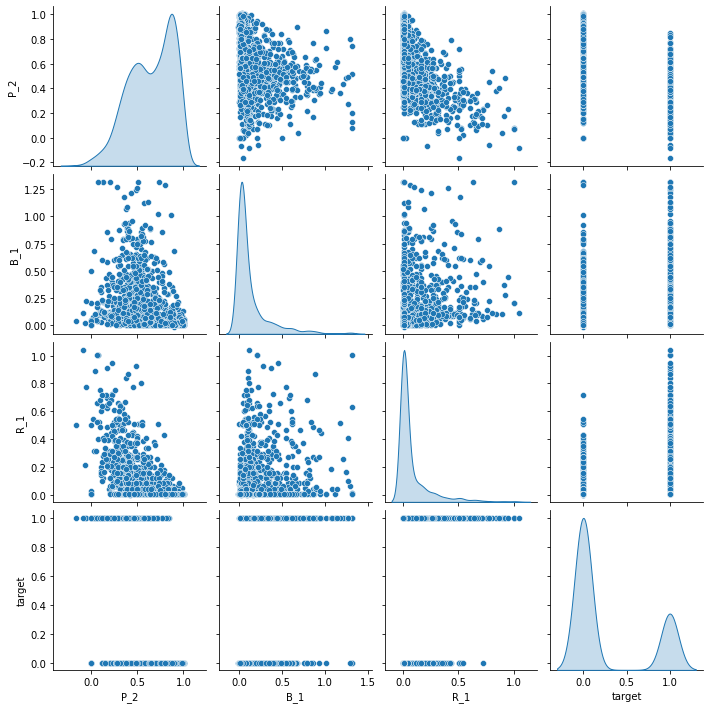

In [129]:
#Inspect the data
#Review the joint distribution of a few pairs of columns from the training set.
sb.pairplot(train_merge[['P_2', 'B_1', 'R_1', 'target']], diag_kind='kde')

In [47]:
#Split the data into training and test sets
#Now, split the dataset into a training set and a test set. You will use the test set in the final evaluation of your models.
train_dataset = train_merge.sample(frac=0.8, random_state=0)
test_dataset = train_merge.drop(train_dataset.index)

In [48]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_2mn,1331.0,0.642888,0.239805,-0.087041,0.454953,0.679521,0.855280,1.005816
D_39mn,1331.0,0.149322,0.159436,0.000475,0.018690,0.104606,0.222573,1.118851
B_1mn,1331.0,0.135007,0.215878,0.003173,0.016968,0.039707,0.147141,1.320220
B_2mn,1331.0,0.610726,0.350895,0.001374,0.251754,0.813151,0.895430,1.007716
R_1mn,1331.0,0.078137,0.147700,0.001261,0.004861,0.005830,0.081809,1.043618
...,...,...,...,...,...,...,...,...
CR_90,1331.0,0.172727,0.378064,0.000000,0.000000,0.000000,0.000000,1.000000
XL_90,1331.0,0.006011,0.075751,0.000000,0.000000,0.000000,0.000000,1.000000
XM_90,1331.0,0.004658,0.067228,0.000000,0.000000,0.000000,0.000000,1.000000
XZ_90,1331.0,0.011721,0.106542,0.000000,0.000000,0.000000,0.000000,1.000000


In [106]:
#Split features from labels
#Separate the target value—the "label"—from the features. This label is the value that you will train the model to predict.
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('target')
test_labels = test_features.pop('target')


In [56]:
train_features.head()

,P_2mn,D_39mn,B_1mn,B_2mn,R_1mn,S_3mn,D_41mn,B_3mn,D_43mn,D_44mn,...,D_141_90,D_143_90,D_144_90,D_145_90,CL_90,CO_90,CR_90,XL_90,XM_90,XZ_90
customer_ID,,,,,,,,,,,,,,,,,,,,,
0090e115fdc7d5915a9547f7b8ac6b7cd03afe016f8128b5ea3007ee3f2d72b8,0.981234,0.142627,0.021051,1.004086,0.006078,0.399708,0.004029,0.005012,0.000000,0.005093,...,0.007784,0.008405,0.008875,0.006974,0.0,1.0,0.0,0.0,0.0,0.0
0033f440ac4cf87ba555f1cef179e20fbcb337ce87a8720fc5fa3b840f63b711,0.846772,0.187677,0.030819,1.004949,0.003358,0.051358,0.005234,0.004838,0.049076,0.004677,...,0.006144,0.008800,0.007375,0.009559,0.0,1.0,0.0,0.0,0.0,0.0
0039a84045012a69e4c7bec971f021613fb0767a80cb88c7f0245d951844e2cf,0.497414,0.033737,0.056360,0.759460,0.043465,0.147495,0.004005,0.016947,0.000000,0.129605,...,0.008153,0.008261,0.008064,0.009439,0.0,1.0,0.0,0.0,0.0,0.0
004d74e9547b2e2e176a6dc2cb7652e159307eb670767653c05c7c0781eda5ee,0.808318,0.045211,0.022446,0.989742,0.003406,0.095561,0.005209,0.004212,0.048672,0.004795,...,0.008369,0.009100,0.009227,0.008035,0.0,1.0,0.0,0.0,0.0,0.0
00e9aa2b9bd84b24ce984f6ebc482474bf4accd0db605778a4af67696c37b421,0.595251,0.005993,0.007554,0.844698,0.004734,0.124843,0.005191,0.005313,0.107825,0.118837,...,0.008110,0.007212,0.009191,0.008944,0.0,1.0,0.0,0.0,0.0,0.0


In [50]:
train_labels.head()

customer_ID
0090e115fdc7d5915a9547f7b8ac6b7cd03afe016f8128b5ea3007ee3f2d72b8    0
0033f440ac4cf87ba555f1cef179e20fbcb337ce87a8720fc5fa3b840f63b711    0
0039a84045012a69e4c7bec971f021613fb0767a80cb88c7f0245d951844e2cf    0
004d74e9547b2e2e176a6dc2cb7652e159307eb670767653c05c7c0781eda5ee    0
00e9aa2b9bd84b24ce984f6ebc482474bf4accd0db605778a4af67696c37b421    0
Name: target, dtype: int64

In [133]:
#Normalization
#In the table of statistics it's easy to see how different the ranges of each feature are:

train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
index,835.945154,481.152399
P_2mn,0.642888,0.239805
D_39mn,0.149322,0.159436
B_1mn,0.135007,0.215878
B_2mn,0.610726,0.350895
...,...,...
D_141_90,0.165695,0.346284
D_143_90,0.178734,0.376254
D_144_90,0.056908,0.194291
D_145_90,0.063023,0.217303


In [51]:
#The Normalization layer
#The tf.keras.layers.Normalization is a clean and simple way to add feature normalization into your model.
#The first step is to create the layer:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features[sel_feature_label]))

In [53]:
train_features[sel_feature_label].shape

(1331, 398)

In [57]:

train_features.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
P_2mn,1331.0,0.642888,0.239805,-0.087041,0.454953,0.679521,0.855280,1.005816
D_39mn,1331.0,0.149322,0.159436,0.000475,0.018690,0.104606,0.222573,1.118851
B_1mn,1331.0,0.135007,0.215878,0.003173,0.016968,0.039707,0.147141,1.320220
B_2mn,1331.0,0.610726,0.350895,0.001374,0.251754,0.813151,0.895430,1.007716
R_1mn,1331.0,0.078137,0.147700,0.001261,0.004861,0.005830,0.081809,1.043618
...,...,...,...,...,...,...,...,...
CO_90,1331.0,0.760481,0.425840,0.000000,1.000000,1.000000,1.000000,1.000000
CR_90,1331.0,0.172727,0.378064,0.000000,0.000000,0.000000,0.000000,1.000000
XL_90,1331.0,0.006011,0.075751,0.000000,0.000000,0.000000,0.000000,1.000000
XM_90,1331.0,0.004658,0.067228,0.000000,0.000000,0.000000,0.000000,1.000000


In [89]:
#Regression with a deep neural network (DNN)
#Two hidden, non-linear, Dense layers with the ReLU (relu) activation function nonlinearity.
#A linear Dense single-output layer.

def build_and_compile_model(norm):
  model = ks.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=[
                    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall')
                ]
               )
  return model

In [59]:
#Regression with a deep neural network (DNN)
#Three hidden, non-linear, Dense layers with the ReLU (relu) activation function nonlinearity.
#A Binary classification.
#Take care of the input_shape, it shange with data. The value use is from the output of command "train_features[sel2_cols].shape"
def build_and_compile_model2(norm):
  model = ks.Sequential([
      norm,
     tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
        )
  return model

In [90]:
#Build the model
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 398)              797       
 n)                                                              
                                                                 
 dense_36 (Dense)            (None, 64)                25536     
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 1)                 65        
                                                                 
Total params: 30,558
Trainable params: 29,761
Non-trainable params: 797
_________________________________________________________________


In [91]:
#Save checkpoints during training
#The tf.keras.callbacks.ModelCheckpoint callback allows you to continually save the model both during and at the end of training.
#check detail at https://www.tensorflow.org/tutorials/keras/save_and_load
import os
checkpoint_path = "training_1/dnn_model.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

### Training the dnn model created

In [92]:
#Fit the model
#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)
#Take note of callbacks=[cp_callback] is included to save the model for reuse
for i in range(1):
    history = dnn_model.fit(
        train_features[sel_feature_label],
        train_labels,
        validation_split=0.2,
        verbose=0, epochs=100,
    callbacks=[cp_callback])
   


Epoch 1: saving model to training_1/dnn_model.ckpt

Epoch 2: saving model to training_1/dnn_model.ckpt

Epoch 3: saving model to training_1/dnn_model.ckpt

Epoch 4: saving model to training_1/dnn_model.ckpt

Epoch 5: saving model to training_1/dnn_model.ckpt

Epoch 6: saving model to training_1/dnn_model.ckpt

Epoch 7: saving model to training_1/dnn_model.ckpt

Epoch 8: saving model to training_1/dnn_model.ckpt

Epoch 9: saving model to training_1/dnn_model.ckpt

Epoch 10: saving model to training_1/dnn_model.ckpt

Epoch 11: saving model to training_1/dnn_model.ckpt

Epoch 12: saving model to training_1/dnn_model.ckpt

Epoch 13: saving model to training_1/dnn_model.ckpt

Epoch 14: saving model to training_1/dnn_model.ckpt

Epoch 15: saving model to training_1/dnn_model.ckpt

Epoch 16: saving model to training_1/dnn_model.ckpt

Epoch 17: saving model to training_1/dnn_model.ckpt

Epoch 18: saving model to training_1/dnn_model.ckpt

Epoch 19: saving model to training_1/dnn_model.ckpt

E

In [93]:
#This creates a single collection of TensorFlow checkpoint files that are updated at the end of each epoch:
os.listdir(checkpoint_dir)

['dnn_model.ckpt.data-00000-of-00001', 'dnn_model.ckpt.index', 'checkpoint']

In [94]:
#Evaluate the model to check the performance of the untrain model
#Take note of a catch-all placeholder while unpacking should it return more than two needed value go for *d
model_DNN=build_and_compile_model(normalizer)
loss, acc, *d = model_DNN.evaluate(test_features[sel_feature_label], test_labels, verbose=1)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))


11/11 [==============================] - 0s 2ms/step - loss: 0.8898 - accuracy: 0.3123 - precision: 0.2778 - recall: 0.9140
Untrained model, accuracy: 31.23%


In [95]:
#Load and use the saved mode and check the performance of the train model by evaluation
#Then load the weights from the checkpoint and re-evaluate:
model_DNN=build_and_compile_model(normalizer)

# Loads the weights
model_DNN.load_weights(checkpoint_path)

# Re-evaluate the model

loss, acc, *d = model_DNN.evaluate(test_features[sel_feature_label], test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

11/11 - 0s - loss: 1.1326 - accuracy: 0.8498 - precision: 0.7654 - recall: 0.6667 - 309ms/epoch - 28ms/step
Restored model, accuracy: 84.98%


#THe above shows that the restore perform better (98.50%) that using the untrain new model (20.50)

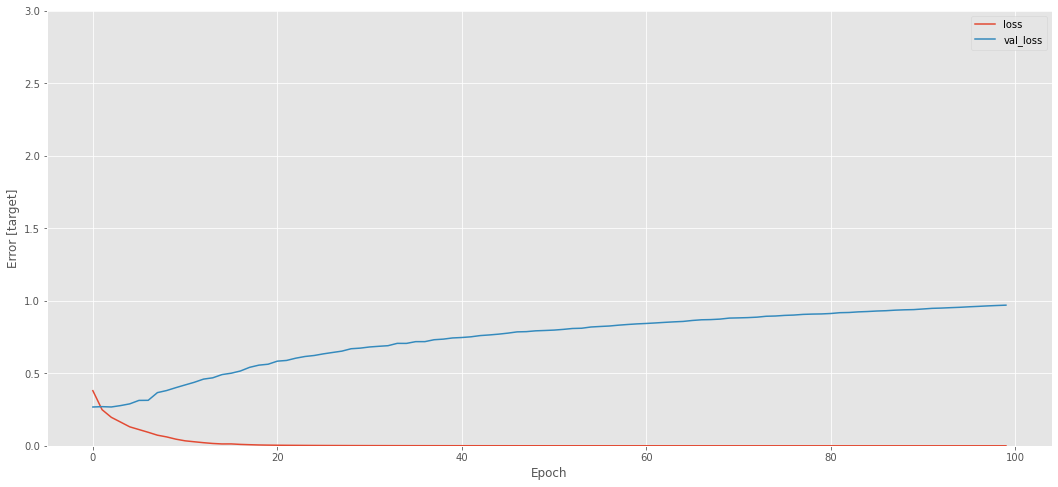

In [96]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 3])
  plt.xlabel('Epoch')
  plt.ylabel('Error [target]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

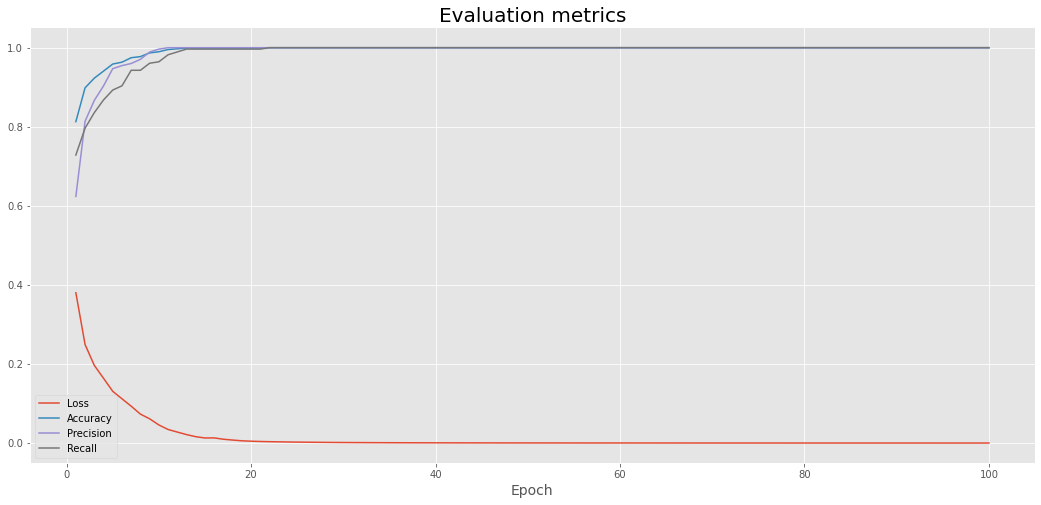

In [97]:
#Visualizing model performance
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [98]:
#Performance Collect the results on the test set:
##TAKE NOTE:
#predict() returns the final output of the model, i.e. answer. While model. evaluate() returns the loss.
#Make predictions
#You can now make predictions with the dnn_model on the test set using Keras Model.predict and review the loss:

test_results = {}

test_results['dnn_model'] = dnn_model.evaluate(test_features[sel_feature_label], test_labels, verbose=0)

train_results = {}
train_results['dnn_model'] = dnn_model.evaluate(train_features[sel_feature_label], train_labels, verbose=0)

pd.Series(train_results)

dnn_model    [0.19465656578540802, 0.9744552969932556, 0.96...
dtype: object

In [99]:

train_features[sel_feature_label].squeeze()

,D_69mn,D_69_90,R_14std,R_14max,B_26std,D_69_75,D_69std,B_21mn,R_14mn,B_26max,...,D_54std,CLmax,B_24max,R_27_25,D_145_25,D_43min,S_8max,R_3std,B_41std,CO_50
customer_ID,,,,,,,,,,,,,,,,,,,,,
0090e115fdc7d5915a9547f7b8ac6b7cd03afe016f8128b5ea3007ee3f2d72b8,0.004190,0.008929,0.003316,0.009757,0.003175,0.005531,0.003121,0.004049,0.004538,0.009436,...,0.002917,0,0.009941,1.001347,0.003504,0.000000,0.414930,0.002388,0.003153,1.0
0033f440ac4cf87ba555f1cef179e20fbcb337ce87a8720fc5fa3b840f63b711,0.004309,0.006963,0.002925,0.009941,0.003405,0.006323,0.002159,0.004548,0.004904,0.009684,...,0.002566,0,0.009733,1.002249,0.003314,0.008523,1.009448,0.130940,0.003364,1.0
0039a84045012a69e4c7bec971f021613fb0767a80cb88c7f0245d951844e2cf,0.178837,0.260334,0.002892,0.009679,0.003136,0.259132,0.121984,0.004790,0.004578,0.009895,...,0.002729,0,0.009989,0.017247,0.003331,0.000000,0.709822,0.086115,0.003347,1.0
004d74e9547b2e2e176a6dc2cb7652e159307eb670767653c05c7c0781eda5ee,0.005492,0.008733,0.003105,0.009858,0.002609,0.008272,0.002802,0.005648,0.004254,0.009512,...,0.002557,0,0.007538,1.002577,0.003129,0.014098,0.761096,0.046819,0.003281,1.0
00e9aa2b9bd84b24ce984f6ebc482474bf4accd0db605778a4af67696c37b421,0.006004,0.008170,0.003156,0.009818,0.003305,0.008008,0.001844,0.004770,0.005570,0.009781,...,0.003169,0,0.007947,1.001197,0.003530,0.063645,0.332361,0.085614,0.003465,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
002a5292e5bf39183ce10d0d1dfb262863f06cf6cb6b2aa76c7ab307abf047e4,0.006650,0.009777,0.002643,0.007862,0.002893,0.008188,0.002679,0.005029,0.005015,0.009116,...,0.002990,0,0.008984,1.003976,0.002877,0.000000,0.705741,0.002269,0.002822,1.0
008703848bc15292ba520c8a07e97c2d45a8c97c51901269654dfecaed1bd2ab,0.003884,0.009348,0.002188,0.007533,0.002888,0.007272,0.003521,0.004309,0.003337,0.008937,...,0.002544,0,0.009948,1.001812,0.003640,0.063576,0.008857,0.048901,0.003152,1.0
006be74ca5aeec5ffe02bb82219182c98f7a1cafc69fe347b89a0294eb1a417f,0.003705,0.008554,0.002938,0.009661,0.028078,0.004727,0.003084,0.004019,0.006364,0.106168,...,0.002324,0,0.007458,0.011020,0.002307,0.104769,0.704870,0.241686,0.002967,1.0


### """## Predictions""" of the dnn model

In [100]:
"""## Predictions"""

train_predictions_log2 = dnn_model.predict(train_features[sel_feature_label])
test_predictions_log2 = dnn_model.predict(test_features[sel_feature_label])

#For the binary function
train_predictions_log_series2 = [
    1 if prob > 0.5 else 0 for prob in np.ravel(train_predictions_log2)
]

test_predictions_log_series2 = [
    1 if prob > 0.5 else 0 for prob in np.ravel(test_predictions_log2)
]

#train_predictions_log_series2 = pd.Series([p['classes'][0].decode("utf-8")   for p in train_predictions_log2])
#test_predictions_log_series2 = pd.Series([p['classes'][0].decode("utf-8")   for p in test_predictions_log2])

train_predictions_log_df2 = pd.DataFrame(train_predictions_log_series2, columns=['prediction'])
test_predictions_log_df2 = pd.DataFrame(test_predictions_log_series2, columns=['prediction'])

train_labels.reset_index(drop=True, inplace=True)
train_predictions_log_df2.reset_index(drop=True, inplace=True)

test_labels.reset_index(drop=True, inplace=True)
test_predictions_log_df2.reset_index(drop=True, inplace=True)

train_labels_with_predictions_log_df2 = pd.concat([train_labels, train_predictions_log_df2], axis=1)
test_labels_with_predictions_log_df2 = pd.concat([test_labels, test_predictions_log_df2], axis=1)

"""## Turn the data predicted into series type"""
train_predictions_log_df3=train_predictions_log_df2.pop('prediction')
test_predictions_log_df3=test_predictions_log_df2.pop('prediction')



11/11 [==============================] - 0s 2ms/step


### """ Validation """ of the dnn model

In [101]:
""" Validation """
def calculate_binary_class_scores(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred.astype('int64'))
  precision = precision_score(y_true, y_pred.astype('int64'))
  recall = recall_score(y_true, y_pred.astype('int64'))
  return accuracy, precision, recall

train_accuracy_score2, train_precision_score2, train_recall_score2 = calculate_binary_class_scores(train_labels, train_predictions_log_df3)
test_accuracy_score2, test_precision_score2, test_recall_score2 = calculate_binary_class_scores(test_labels, test_predictions_log_df3)

print('Training Data Accuracy (%) = ', round(train_accuracy_score2*100,2))
print('Training Data Precision (%) = ', round(train_precision_score2*100,2))
print('Training Data Recall (%) = ', round(train_recall_score2*100,2))
print('-'*50)
print('Test Data Accuracy (%) = ', round(test_accuracy_score2*100,2))
print('Test Data Precision (%) = ', round(test_precision_score2*100,2))
print('Test Data Recall (%) = ', round(test_recall_score2*100,2))


Training Data Accuracy (%) =  97.45
Training Data Precision (%) =  96.01
Training Data Recall (%) =  94.4
--------------------------------------------------
Test Data Accuracy (%) =  84.98
Test Data Precision (%) =  76.54
Test Data Recall (%) =  66.67


In [153]:
train_labels.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [154]:
train_predictions_log_df3

0       0
1       0
2       0
3       0
4       0
       ..
1326    0
1327    0
1328    1
1329    1
1330    1
Name: prediction, Length: 1331, dtype: int64

## PREDICTING THE TEST RESULT THAT HAS NO TARGET AVAILABLE

In [102]:
test_X.head(2)


,D_69mn,D_69_90,R_14std,R_14max,B_26std,D_69_75,D_69std,B_21mn,R_14mn,B_26max,...,D_54std,CLmax,B_24max,R_27_25,D_145_25,D_43min,S_8max,R_3std,B_41std,CO_50
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,0.003464,0.007355,0.002851,0.008858,0.002897,0.006901,0.003637,0.007771,0.004547,0.009331,...,0.002249,0,0.009796,1.004883,0.002626,0.0,0.464111,0.003479,0.003189,0.0
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0.003704,0.007980,0.002369,0.008728,0.002413,0.006290,0.002869,0.006817,0.005253,0.007206,...,0.003582,0,0.008942,1.001953,0.003531,0.0,1.004883,0.002962,0.003004,1.0


In [312]:
#test_X.set_index('customer_ID', inplace=True)
test_X.head(2)

,S_24std,D_69mn,D_69_90,D_69_75,R_7std,S_24min,R_7max,S_22std,D_69max,D_103max,...,D_96_50,B_36_75,R_15_50,R_6min,S_19_50,R_23max,R_7min,D_89mn,R_17_75,R_5min
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,0.019800,0.003463,0.007353,0.006901,0.002383,0.904863,0.008546,0.024732,0.008136,0.009274,...,0.003944,0.007743,0.002307,0.001771,0.005323,0.009924,0.001974,0.004934,0.006680,0.001064
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0.046244,0.003705,0.007977,0.006291,0.002718,0.811676,0.009793,0.022792,0.008627,0.006364,...,0.009926,0.007424,0.006249,0.000215,0.006121,0.009586,0.001278,0.004422,0.008904,0.000388


In [103]:
#Use the model build dnn_model or its restore version model_DNN 
test_predictions = dnn_model.predict(test_X[sel_feature_label]).flatten()


51/51 [==============================] - 0s 2ms/step


In [104]:
#For the binary function
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(test_predictions)
]



In [107]:

test_X_predictions_log_df2 = pd.DataFrame(prediction_classes, columns=['prediction'])

test_X.reset_index(inplace=True)
test_name= test_X['customer_ID']
test_X_labels_with_predictions_log_df2 = pd.concat([test_name, test_X_predictions_log_df2], axis=1)

#Save with no index
test_X_labels_with_predictions_log_df2.to_csv("sample_submission_2.csv", index=False)

test_X_labels_with_predictions_log_df2.head(10)


,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0
5,00004ffe6e01e1b688170bbd108da8351bc4c316eacfef...,0
6,00007cfcce97abfa0b4fa0647986157281d01d3ab90de9...,1
7,000089cc2a30dad8e6ba39126f9d86df6088c9f975093a...,1
8,00008f50a1dd76fa211ba36a2b0d5a1b201e4134a5fd53...,1
9,0000b48a4f27dc1d61e78d081678e811620300b88eb3ab...,0


In [317]:

test_X_predictions_log_df2.head()

,prediction
0,0
1,0
2,0
3,0
4,0


# 6.4 Using logistic is better for this data because the prediction is either 1 or 0
## """## Model Training"""


In [60]:
X_data = train_merge[sel_feature_label]
Y_data = train_merge['target']

In [61]:
"""## Train Test Split"""
training_features , test_features ,training_labels, test_labels = train_test_split(X_data , Y_data , test_size=0.2)

In [62]:
X_data

,S_24std,P_4mn,S_22min,D_107mn,D_130mn,B_19mn,D_80mn,D_47_90,D_74_75,R_7std,...,D_77std,D_43_75,D_119_25,D_58std,CLmax,D_61mn,B_32max,B_38_25,D_122min,B_40_50
0,0.016595,0.005670,0.891921,0.672166,0.005195,0.005231,0.081974,0.539585,0.077683,0.002007,...,0.157462,0.000000,0.241885,0.069456,0,0.191101,0.008749,2.0,0.429886,0.100454
1,0.047019,0.005322,0.847383,0.005859,0.003449,0.004915,0.005388,0.401665,0.007647,0.003069,...,0.002707,0.079258,0.425255,0.002801,0,0.053319,0.009860,2.0,0.286004,0.019811
2,0.010531,0.006113,0.295220,0.005376,0.005951,0.005238,0.004975,0.338947,0.008531,0.002910,...,0.071670,0.000000,0.349380,0.037544,0,0.109526,0.009677,1.0,0.143613,0.024902
3,0.010208,0.004749,0.931634,0.005643,0.004509,0.004899,0.004887,0.409860,0.009304,0.003194,...,0.204604,0.075739,0.041089,0.034747,0,0.046296,0.009949,2.0,0.289099,0.022896
4,0.317700,0.003856,0.295498,1.005590,1.005500,0.004080,0.205344,0.481048,0.148753,0.002912,...,0.176873,0.051788,0.422998,0.102317,0,0.356445,0.008018,1.0,0.429008,0.165166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,0.023998,0.005469,0.876998,0.311512,0.003466,0.787986,0.005155,0.096528,0.078987,0.022565,...,0.000000,0.207561,0.056648,0.043784,0,0.916430,1.007899,6.0,0.143055,0.474472
1660,0.000000,0.008283,0.938378,0.342050,0.006986,0.000108,0.407555,0.569385,0.078201,0.000000,...,0.000000,0.000000,0.008344,0.000000,0,0.296327,0.003560,1.0,0.148544,0.050326
1661,0.006522,0.005486,0.950777,0.157639,0.003748,0.005103,0.005017,0.394259,0.007911,0.003207,...,0.146901,0.014221,0.072750,0.002171,0,0.011390,0.009861,2.0,0.574316,0.027978
1662,0.021454,0.004619,0.869574,0.005216,0.003422,0.004899,0.003826,0.788340,0.008998,0.002529,...,0.003083,0.000000,0.283386,0.002445,0,0.110456,0.008638,2.0,0.429978,0.020681


In [104]:
training_features 

,B_10_50,B_10_90,B_10max,B_10min,B_10mn,B_11_25,B_11_50,B_11_75,B_11max,B_11min,...,S_3min,S_3mn,S_6_75,S_6max,S_6min,S_6mn,S_7_25,S_7_75,S_8max,S_8mn
1633,0.299038,0.302336,0.302864,0.271314,0.297070,0.019789,0.023319,0.037871,0.053939,0.015028,...,0.105262,0.121970,0.007029,0.009583,0.000139,0.005005,0.083781,0.094232,0.761605,0.655872
476,0.019989,0.133582,0.239342,0.009613,0.054473,0.002359,0.190580,0.400486,0.775971,0.000759,...,0.000000,0.131467,1.007017,1.007782,0.007020,0.839622,0.000000,0.244884,0.175404,0.035599
1505,0.059140,0.101085,0.154390,0.006678,0.063520,0.002768,0.005323,0.008889,0.009330,0.000457,...,0.000000,0.000000,1.006960,1.009722,1.000967,1.004621,0.000000,0.000000,0.009992,0.004002
692,0.293068,0.300112,0.364345,0.098107,0.259447,0.003481,0.006737,0.009636,0.018497,0.000250,...,0.172726,0.233610,1.000476,1.008513,0.000400,0.311348,0.168447,0.178759,0.468269,0.143962
930,0.022323,0.056054,0.058398,0.006846,0.026132,0.002653,0.004070,0.006776,0.009788,0.000404,...,0.000000,0.000000,1.008362,1.009907,1.001154,1.005666,0.000000,0.000000,0.009366,0.004338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,0.016530,0.028122,0.028935,0.009818,0.018063,0.666358,0.685654,0.760925,1.046832,0.627302,...,0.090447,0.134086,0.008560,0.009825,0.000096,0.005606,0.078832,0.104317,0.854498,0.392710
550,0.032801,0.077124,0.097948,0.020085,0.044349,0.315354,0.396051,0.442919,0.489146,0.272461,...,0.203681,0.366049,0.009782,1.007533,0.000445,0.236848,0.256385,0.364238,0.170294,0.038760
1655,0.066702,0.133054,0.175962,0.047972,0.083439,0.046688,0.051484,0.072953,0.150716,0.036859,...,0.210080,0.445359,0.005246,0.007733,0.001616,0.004093,0.371628,0.698867,0.596758,0.382802
1438,0.243678,0.330840,0.379453,0.071293,0.230513,0.008820,0.011543,0.041580,0.085540,0.001987,...,0.000000,0.078880,0.255906,1.009579,0.000176,0.254479,0.104455,0.132705,1.005744,0.734015


In [20]:
#Free memory by deleting the train_data
#del train_data
del X_data
del Y_data
gc.collect()

In [26]:
training_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
S_26,1331.0,0.058893,0.200180,0.000391,0.004848,0.005920,0.028729,3.331670
D_126,1331.0,0.722500,0.451699,-0.538462,0.615385,1.000000,1.000000,1.000000
S_17,1331.0,0.037950,0.187458,0.000112,0.004546,0.005253,0.006178,3.709211
D_124,1331.0,0.289942,0.219432,-0.041358,0.139944,0.233289,0.413576,1.372668
B_36,1331.0,0.005581,0.010077,0.000045,0.004376,0.004985,0.005548,0.277719
...,...,...,...,...,...,...,...,...
R_1,1331.0,0.082810,0.158376,0.001261,0.004848,0.005859,0.082073,1.043618
B_9,1331.0,0.196127,0.247887,0.000760,0.005653,0.052460,0.363856,1.505034
B_2,1331.0,0.614523,0.350669,0.001374,0.259870,0.813499,0.912444,1.007716
D_48,1331.0,0.352347,0.314095,-0.005853,0.070343,0.240978,0.629760,1.197729


In [263]:
"""## Normalize Data"""

def norm(x):
  stats = x.describe()
  stats = stats.transpose()
  return (x - stats['mean']) / stats['std']

normed_train_features = norm(training_features)
normed_test_features = norm(test_features)

In [264]:
normed_train_features

,S_24std,D_69mn,D_69_90,D_69_75,R_7std,S_24min,R_7max,S_22std,D_69max,D_103max,...,D_96_50,B_36_75,R_15_50,R_6min,S_19_50,R_23max,R_7min,D_89mn,R_17_75,R_5min
customer_ID,,,,,,,,,,,,,,,,,,,,,
00a612fceb2594417f9f084f8c88cfa0a347c3177fdf1ed1662fba0bc153b082,-0.153415,-0.046325,-0.049247,-0.047406,-0.137411,0.160106,-0.133231,-0.141375,-0.050025,0.947359,...,-0.144530,-0.012470,-0.018972,-0.025061,0.096990,-0.055750,-0.037398,-0.210563,-0.201915,-0.023751
00602f476ee4acea16c0e4de2c8ed8f9beffc4e5642cb6e040de2c5a4ec907e6,-0.163669,-0.046801,-0.049175,-0.048101,-0.137419,0.188860,-0.133438,-0.164976,-0.049960,-1.055249,...,-0.140809,-0.075952,-0.052645,-0.038319,-0.125837,-0.061209,-0.043026,-0.094116,0.315250,-0.055105
001cf7c4466fd79fe548cf3cf8603efe2e89d6b25e457014c26e3fea9c361c37,-0.171080,-0.046808,-0.049439,-0.047739,-0.137749,-0.161192,-0.133378,-0.146166,-0.050039,-1.058721,...,-0.150673,0.004616,-0.009774,-0.038859,-0.493160,-0.032412,-0.041958,-0.078755,-0.523459,-0.080154
00d7d1eadc42a3ee1f69eae6a969bcd84e5b293f08b257e876cf918347b544a9,-0.157289,-0.046422,-0.049316,-0.047527,-0.136816,-0.113383,-0.133320,-0.148054,-0.050120,-1.057167,...,-0.142876,-0.091520,-0.055169,-0.033087,-0.576670,-0.056460,-0.042232,-0.144646,0.133815,-0.027542
008d99a1b105bf4d6e1eaaeaedad7312930ef19e09a38ef643fe836454bee124,0.229936,-0.046450,-0.049239,-0.047349,-0.137871,-0.133658,-0.133227,0.178883,-0.050129,0.948242,...,-0.149406,-0.003427,-0.082490,-0.034434,-1.230023,-0.035785,-0.039284,0.014664,-0.191321,0.011384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
002d6c879b55da7dca6b7ae8bb5054a8ab9c5b24e0b15717f46c900f01977e59,-0.139927,-0.046833,-0.049541,-0.048249,-0.137998,-0.143891,-0.133562,-0.165170,-0.050094,-1.054532,...,-0.154611,0.014913,-0.070741,-0.035763,0.538860,-0.066752,-0.037897,-0.082025,0.024458,-0.083721
00836f8250511d60b423da080ece2a4b3ca250f6075feb629b5265d6bd487594,-0.159314,-0.046351,-0.049082,-0.047411,-0.138351,0.175931,-0.133340,-0.152018,-0.049959,0.948316,...,-0.159854,0.030524,-0.063099,-0.035560,0.313467,-0.035026,-0.018590,-0.330119,-0.701950,-0.066745
0051111590b08c02df1bb1c375838df6113d2ed03648000077a098f9e8cb20f3,0.309736,-0.046566,-0.049317,-0.047465,-0.136937,-0.144535,-0.133256,0.248736,-0.050220,0.948359,...,-0.143075,0.000367,-0.067519,-0.031947,-1.469451,-0.034274,-0.042492,-0.113381,0.043379,-0.052940


In [26]:
#del training_features
#del test_features
#del normed_train_features 
#del normed_test_features
#gc.collect()

### Reduce memory usage

In [8]:
#Reduce memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

training_features = reduce_mem_usage(training_features)
test_features = reduce_mem_usage(test_features)

NameError: name 'training_features' is not defined

In [266]:
normed_train_features = reduce_mem_usage(normed_train_features)
normed_test_features = reduce_mem_usage(normed_test_features)

Memory usage after optimization is: 1.60 MB
Decreased by 74.9%
Memory usage after optimization is: 0.40 MB
Decreased by 74.9%


In [267]:
"""## Build the Input Pipeline for TensorFlow model"""

def feed_input(features_dataframe, target_dataframe, num_of_epochs=10, shuffle=True, batch_size=32):
  def input_feed_function():
    dataset = tf.data.Dataset.from_tensor_slices((dict(features_dataframe), target_dataframe))
    if shuffle:
      dataset = dataset.shuffle(2000)
    dataset = dataset.batch(batch_size).repeat(num_of_epochs)
    return dataset
  return input_feed_function

In [112]:
train_feed_input = feed_input(normed_train_features, training_labels)
train_feed_input_testing = feed_input(normed_train_features, training_labels, num_of_epochs=1, shuffle=False)
test_feed_input = feed_input(normed_test_features, test_labels, num_of_epochs=1, shuffle=False)

In [113]:

feature_columns_numeric = [tf.feature_column.numeric_column(m) for m in training_features.columns]

logistic_model = LinearClassifier(feature_columns=feature_columns_numeric)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpr7ividzp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [186]:
#Training the model: run it three times
for i in range(3):
    logistic_model.train(train_feed_input)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpr7ividzp/model.ckpt-420
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 420...
INFO:tensorflow:Saving checkpoints for 420 into /tmp/tmpr7ividzp/model.ckpt.
INFO:tensorflow:/tmp/tmpr7ividzp/model.ckpt-420.meta
INFO:tensorflow:11100
INFO:tensorflow:/tmp/tmpr7ividzp/model.ckpt-420.data-00000-of-00001
INFO:tensorflow:11100
INFO:tensorflow:/tmp/tmpr7ividzp/model.ckpt-420.index
INFO:tensorflow:11200
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 420...
INFO:tensorflow:loss = 0.35268408, step = 420
INFO:tensorflow:global_step/sec: 19.3821
INFO:tensorflow:loss = 0.09498742, step = 520 (5.160 sec)
INF

## """## Predictions""" Logistic regression

In [115]:
"""## Predictions"""

train_predictions_log = logistic_model.predict(train_feed_input_testing)
test_predictions_log = logistic_model.predict(test_feed_input)

train_predictions_log_series = pd.Series([p['classes'][0].decode("utf-8")   for p in train_predictions_log])
test_predictions_log_series = pd.Series([p['classes'][0].decode("utf-8")   for p in test_predictions_log])

train_predictions_log_df = pd.DataFrame(train_predictions_log_series, columns=['prediction'])
test_predictions_log_df = pd.DataFrame(test_predictions_log_series, columns=['prediction'])

training_labels.reset_index(drop=True, inplace=True)
train_predictions_log_df.reset_index(drop=True, inplace=True)

test_labels.reset_index(drop=True, inplace=True)
test_predictions_log_df.reset_index(drop=True, inplace=True)

train_labels_with_predictions_log_df = pd.concat([training_labels, train_predictions_log_df], axis=1)
test_labels_with_predictions_log_df = pd.concat([test_labels, test_predictions_log_df], axis=1)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpr7ividzp/model.ckpt-420
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpr7ividzp/model.ckpt-420
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [116]:
print('Training prediction')
print(train_labels_with_predictions_log_df.head())
print('Test prediction')
print(test_labels_with_predictions_log_df.head())

Training prediction
   target prediction
0       0          0
1       1          1
2       0          0
3       0          0
4       0          0
Test prediction
   target prediction
0       1          0
1       0          0
2       1          1
3       1          1
4       0          0


## """## Validation""" logistic regression

In [117]:
"""## Validation"""

def calculate_binary_class_scores(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred.astype('int64'))
  precision = precision_score(y_true, y_pred.astype('int64'))
  recall = recall_score(y_true, y_pred.astype('int64'))
  return accuracy, precision, recall

train_accuracy_score, train_precision_score, train_recall_score = calculate_binary_class_scores(training_labels, train_predictions_log_series)
test_accuracy_score, test_precision_score, test_recall_score = calculate_binary_class_scores(test_labels, test_predictions_log_series)

print('Training Data Accuracy (%) = ', round(train_accuracy_score*100,2))
print('Training Data Precision (%) = ', round(train_precision_score*100,2))
print('Training Data Recall (%) = ', round(train_recall_score*100,2))
print('-'*50)
print('Test Data Accuracy (%) = ', round(test_accuracy_score*100,2))
print('Test Data Precision (%) = ', round(test_precision_score*100,2))
print('Test Data Recall (%) = ', round(test_recall_score*100,2))


Training Data Accuracy (%) =  94.06
Training Data Precision (%) =  87.71
Training Data Recall (%) =  89.97
--------------------------------------------------
Test Data Accuracy (%) =  84.08
Test Data Precision (%) =  73.53
Test Data Recall (%) =  74.26


In [4]:
#Load the test file
#test_data = pd.read_parquet('../input/american-express-default-prediction-snappy-parquet/test_data.snappy.parquet')

#Read fewer lines of the data
from pyarrow.parquet import ParquetFile
import pyarrow as pa 
"""
pf = ParquetFile('../input/american-express-default-prediction-snappy-parquet/test_data.snappy.parquet') 
first_ten_rows = next(pf.iter_batches(batch_size = 3000000)) 
test_data = pa.Table.from_batches([first_ten_rows]).to_pandas()
test_data.head()
"""



In [37]:
""## Select the required columns"""
test_X = test_merge[sel_feature_label]





In [17]:
del test_data
#del test_X
#del normed_test_X_features
gc.collect()

In [284]:
"""## Normalize Data"""

def norm(x):
  stats = x.describe()
  stats = stats.transpose()
  return (x - stats['mean']) / stats['std']

normed_test_X_features = norm(test_X)


In [285]:
"""## Build the Input Pipeline for TensorFlow model with no target to predic the target"""

def feed_input2(features_dataframe, num_of_epochs=10, shuffle=True, batch_size=32):
  def input_feed_function():
    dataset = tf.data.Dataset.from_tensor_slices((dict(features_dataframe)))
    if shuffle:
      dataset = dataset.shuffle(2000)
    dataset = dataset.batch(batch_size).repeat(num_of_epochs)
    return dataset
  return input_feed_function

test_X_feed_input = feed_input2(normed_test_X_features, num_of_epochs=1, shuffle=False)

In [170]:
normed_test_X_features

,B_10_50,B_10_90,B_10max,B_10min,B_10mn,B_11_25,B_11_50,B_11_75,B_11max,B_11min,...,S_3min,S_3mn,S_6_75,S_6max,S_6min,S_6mn,S_7_25,S_7_75,S_8max,S_8mn
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,-0.458368,-0.137052,-0.123068,-0.912189,-0.210339,-0.474978,-0.520452,-0.574829,-0.664173,-0.402481,...,0.362355,-0.005457,-0.666774,1.184524,-0.375006,-0.032113,0.193780,-0.129380,-0.420074,-0.297948
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0.420016,-0.042647,-0.080628,1.716838,0.059098,-0.466355,-0.420666,-0.485034,0.142606,-0.416762,...,-0.409411,-0.404161,-0.666833,-0.845130,-0.374719,-0.660717,-0.557815,-0.513208,1.226766,1.781445
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,-0.074651,-0.043934,-0.081405,-0.183541,-0.050277,-0.478855,-0.513722,-0.563819,-0.620654,-0.417431,...,0.223452,-0.156889,-0.664324,-0.841564,-0.375839,-0.661915,0.210526,-0.090027,0.480297,-0.060660
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,-0.500769,-0.144416,-0.128556,-0.763603,-0.223554,1.157143,0.955609,0.780063,0.464789,0.548760,...,0.624056,0.585948,-0.665160,-0.841068,-0.375835,-0.658861,2.637161,1.617790,0.457993,0.734166
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,-0.499539,-0.143773,-0.127363,-0.776868,-0.223412,1.487456,1.681464,1.472046,1.143486,1.843028,...,0.412682,-0.136426,-0.665194,-0.841254,-0.373016,-0.657329,-0.137161,-0.359030,0.010409,-0.259590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0072e36664f7403b67cb4b1d2ef2da9a806915b35295a9da29a6c6bdcf57240a,0.789171,0.461029,0.242490,0.928533,0.509955,-0.462478,-0.479904,-0.504285,-0.608605,-0.396012,...,0.633115,1.278990,-0.669628,-0.841828,-0.375953,-0.661937,0.892344,1.060377,0.460967,-0.071365
0072eab425346d0db219e92ad5edae3ee1e4095163a18cbb9bac5c9cceb1770c,-0.502666,-0.144497,-0.128871,-0.781808,-0.225255,0.505575,0.328134,0.169304,-0.045775,0.775449,...,0.458983,0.251023,-0.666681,-0.841843,-0.374506,-0.661430,0.226475,0.549326,-0.420818,-0.766280
0072eca646a1641e63aed6f48e1b31635c212b77e0902c28a1ce6cfa07976084,-0.371616,-0.113465,-0.112386,-0.564429,-0.177545,-0.152787,-0.179664,-0.222310,-0.328345,-0.081266,...,0.303976,-0.113233,-0.668910,-0.842107,-0.374417,-0.660318,-0.157097,-0.126685,0.486245,0.871543


In [171]:
"""## Predictions"""

test_X_predictions_log = logistic_model.predict(test_X_feed_input)

test_X_predictions_log_series = pd.Series([p['classes'][0].decode("utf-8")   for p in test_X_predictions_log])

test_X_predictions_log_df = pd.DataFrame(test_X_predictions_log_series, columns=['prediction'])


test_X_predictions_log_df.reset_index(drop=True, inplace=True)



INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpr7ividzp/model.ckpt-420
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [172]:
test_X_predictions_log_df.head()

,prediction
0,0
1,0
2,0
3,0
4,1


In [173]:
test_X.reset_index(inplace=True)
test_name= test_X['customer_ID']
test_X_labels_with_predictions_log_df = pd.concat([test_name, test_X_predictions_log_df], axis=1)

#Save with no index
test_X_labels_with_predictions_log_df.to_csv("sample_submission_1.csv", index=False)

test_X_labels_with_predictions_log_df.head()

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,1


# 6.5 """ Linear Regression (Not relevant to the competition) """

### Linear regression
### """ Model Training"""

In [76]:
"""## Model Training"""

feature_columns_numeric = [tf.feature_column.numeric_column(m) for m in training_features.columns]

linear_model = LinearRegressor(feature_columns=feature_columns_numeric, optimizer='RMSProp')

#Training the model: run it three times
#process1 = multiprocessing.Process(target=useless_function)
for i in range(3):
    linear_model.train(train_feed_input)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp9izx8y_a', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:ten

In [86]:
"""## Predictions"""

train_predictions = linear_model.predict(train_feed_input_testing)
test_predictions = linear_model.predict(test_feed_input)

train_predictions_series = pd.Series([p['predictions'][0] for p in train_predictions])
test_predictions_series = pd.Series([p['predictions'][0] for p in test_predictions])

train_predictions_df = pd.DataFrame(train_predictions_series, columns=['prediction'])
test_predictions_df = pd.DataFrame(test_predictions_series, columns=['prediction'])

training_labels.reset_index(drop=True, inplace=True)
train_predictions_df.reset_index(drop=True, inplace=True)

test_labels.reset_index(drop=True, inplace=True)
test_predictions_df.reset_index(drop=True, inplace=True)

train_labels_with_predictions_df = pd.concat([training_labels, train_predictions_df], axis=1)
test_labels_with_predictions_df = pd.concat([test_labels, test_predictions_df], axis=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9izx8y_a/model.ckpt-1260
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9izx8y_a/model.ckpt-1260
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [87]:
print('Training prediction')
print(train_labels_with_predictions_df.head())
print('Test prediction')
print(test_labels_with_predictions_df.head())


Training prediction
   target  prediction
0       0   -1.498089
1       0    2.241476
2       0   -0.454799
3       1   -1.021809
4       1    1.321661
Test prediction
   target  prediction
0       0   -3.498487
1       0    1.087675
2       0   -2.877259
3       0    1.375513
4       0    2.599055


In [35]:
"""## Validation"""

def calculate_errors_and_r2(y_true, y_pred):
  mean_squared_err = (mean_squared_error(y_true, y_pred))
  root_mean_squared_err = np.sqrt(mean_squared_err)
  r2 = round(r2_score(y_true, y_pred)*100,0)
  return mean_squared_err, root_mean_squared_err, r2

train_mean_squared_error, train_root_mean_squared_error, train_r2_score_percentage = calculate_errors_and_r2(training_labels, train_predictions_series)
test_mean_squared_error, test_root_mean_squared_error, test_r2_score_percentage = calculate_errors_and_r2(test_labels, test_predictions_series)

print('Training Data Mean Squared Error = ', train_mean_squared_error)
print('Training Data Root Mean Squared Error = ', train_root_mean_squared_error)
print('Training Data R2 = ', train_r2_score_percentage)

print('Test Data Mean Squared Error = ', test_mean_squared_error)
print('Test Data Root Mean Squared Error = ', test_root_mean_squared_error)
print('Test Data R2 = ', test_r2_score_percentage)
